In [1]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('loan.csv')

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Distribution Plot for Target Variable

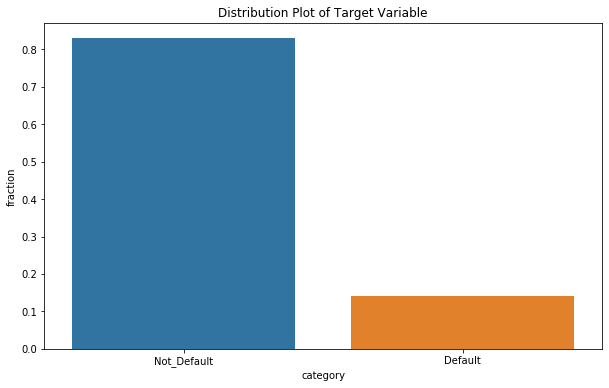

In [4]:
not_default = df.loc[(df.loan_status == 'Fully Paid'),:].shape[0]/df.shape[0]
default = df.loc[(df.loan_status == 'Charged Off'),:].shape[0]/df.shape[0]
df_dist = pd.DataFrame({'category':['Not_Default','Default'], 'fraction':[not_default, default]})

plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'fraction', data = df_dist)
plt.title('Distribution Plot of Target Variable')

plt.show()

# Continuous Feature (Variable) Analysis

## 1. loan_amnt
## 2. funded_amnt
## 3. funded_amnt_inv
## 4. int_rate
## 5. installment
## 6. annual_inc
## 7. dti
## 8. mths_since_last_delinq
## 9. mths_since_last_record
## 10. open_acc
## 11. revol_bal
## 12. revol_util
## 13. total_acc
## 14. out_prncp
## 15. out_prncp_inv
## 16. total_pymnt
## 17. total_pymnt_inv
## 18. total_rec_prncp
## 19. total_rec_int
## 20. total_rec_late_fee
## 21. recoveries
## 22. collection_recovery_fee
## 23. last_pymnt_amnt

### Checking for Null Values

In [5]:
null_dict_check = {'loan_amnt': df.isnull().any(axis = 0)['loan_amnt'],'funded_amnt': df.isnull().any(axis = 0)['funded_amnt'], 
             'funded_amnt_inv': df.isnull().any(axis = 0)['funded_amnt_inv'],
            'int_rate' : df.isnull().any(axis = 0)['int_rate'], 'installment' : df.isnull().any(axis = 0)['installment'],
            'annual_inc' : df.isnull().any(axis = 0)['annual_inc'], 'dti' : df.isnull().any(axis = 0)['dti'],
            'mths_since_last_delinq' : df.isnull().any(axis = 0)['mths_since_last_delinq'], 'mths_since_last_record' : 
            df.isnull().any(axis = 0)['mths_since_last_record'], 'open_acc' : df.isnull().any(axis = 0)['open_acc'],
            'revol_bal' : df.isnull().any(axis = 0)['revol_bal'], 'revol_util' : df.isnull().any(axis = 0)['revol_util'],
            'total_acc' : df.isnull().any(axis = 0)['total_acc'], 'out_prncp' : df.isnull().any(axis = 0)['out_prncp'],
             'out_prncp_inv' : df.isnull().any(axis = 0)['out_prncp_inv'], 'total_pymnt' : df.isnull().any(axis = 0)['total_pymnt'],
            'total_pymnt_inv' : df.isnull().any(axis = 0)['total_pymnt_inv'], 'total_rec_prncp' : df.isnull().any(axis = 0)['total_rec_prncp'],
            'total_rec_int' : df.isnull().any(axis = 0)['total_rec_int'], 'total_rec_late_fee' : df.isnull().any(axis = 0)['total_rec_late_fee'],
            'recoveries' : df.isnull().any(axis = 0)['recoveries'], 'collection_recovery_fee' : df.isnull().any(axis = 0)['collection_recovery_fee'],
            'last_pymnt_amnt' : df.isnull().any(axis = 0)['last_pymnt_amnt']}

In [6]:
null_dict_check

{'loan_amnt': False,
 'funded_amnt': False,
 'funded_amnt_inv': False,
 'int_rate': False,
 'installment': False,
 'annual_inc': False,
 'dti': False,
 'mths_since_last_delinq': True,
 'mths_since_last_record': True,
 'open_acc': False,
 'revol_bal': False,
 'revol_util': True,
 'total_acc': False,
 'out_prncp': False,
 'out_prncp_inv': False,
 'total_pymnt': False,
 'total_pymnt_inv': False,
 'total_rec_prncp': False,
 'total_rec_int': False,
 'total_rec_late_fee': False,
 'recoveries': False,
 'collection_recovery_fee': False,
 'last_pymnt_amnt': False}

In [7]:
feature_containing_null = [x for x in null_dict_check if null_dict_check[x] == True]

In [8]:
feature_containing_null

['mths_since_last_delinq', 'mths_since_last_record', 'revol_util']

In [9]:
# Finding % of missing values in mths_since_last_delinq
round(100 * (df.isnull().sum()['mths_since_last_delinq'].sum()/len(df.index)),2)

64.66

In [10]:
# Finding % of missing values in mths_since_last_record
round(100 * (df.isnull().sum()['mths_since_last_record'].sum()/len(df.index)),2)

92.99

In [11]:
# Finding % of missing values in revol_util
round(100 * (df.isnull().sum()['revol_util'].sum()/len(df.index)),2)

0.13

In [12]:
# Imputing with median for mths_since_last_delinq as it contains 64.66% NaN Values respectively:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')

df['mths_since_last_delinq'] = imp.fit_transform(np.array(df['mths_since_last_delinq']).reshape(-1, 1))

In [13]:
# ths_since_last_record is dropped from the analysis as it contains 92.99% NaN values
df_continuous = df.loc[:,[x for x in (list(null_dict_check.keys()) + ['loan_status']) if x != 'mths_since_last_record']]

In [14]:
# As only 0.13% NaN values are there for revol_util, those rows are removed
df_continuous = df_continuous[df_continuous['revol_util'].notna()]

In [15]:
# Extracting the float value of int_rate and revol_util by stripping off the '%' sign from both data-frames
df_continuous['int_rate'] = pd.Series([float(x.split('%')[0]) for x in np.array(df_continuous['int_rate'])])
df_continuous['revol_util'] = pd.Series([float(x.split('%')[0]) for x in np.array(df_continuous['revol_util'])])

# Understanding the mutual correlation for continuous variables

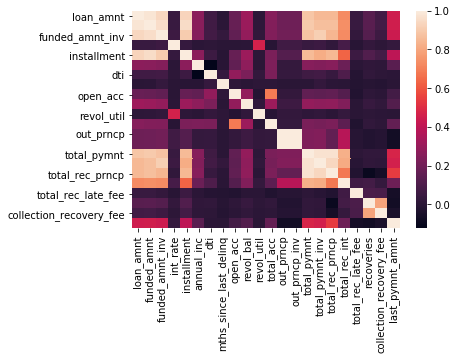

In [16]:
sns.heatmap(df_continuous.corr())

In [17]:
# Non-Defaulter for loan_status as full-paid
df_not_default = df_continuous.loc[(df_continuous.loan_status == 'Fully Paid'),:]
df_not_default.reset_index(inplace = True)
df_not_default = df_not_default.iloc[:,1:]
# Defaulter for loan_status as charged-off
df_default = df_continuous.loc[(df_continuous.loan_status == 'Charged Off'),:]
df_default.reset_index(inplace = True)
df_default = df_default.iloc[:,1:]

## 1. loan_amnt

## Bar Plot

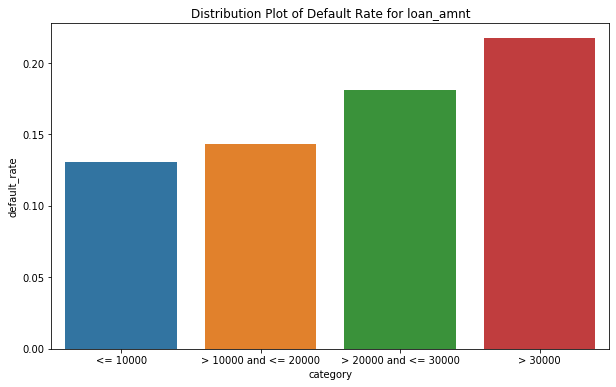

In [18]:
dd_1 = (df_default.loc[(df_default.loan_amnt <= 10000),:]).shape[0]/(df_continuous.loc[(df_continuous.loan_amnt <= 10000),:]).shape[0]
dd_2 = (df_default.loc[(df_default.loan_amnt > 10000) & (df_default.loan_amnt <= 20000),:]).shape[0]/(df_continuous.loc[(df_continuous.loan_amnt > 10000) & (df_continuous.loan_amnt <= 20000),:]).shape[0]
dd_3 = (df_default.loc[(df_default.loan_amnt > 20000) & (df_default.loan_amnt <= 30000),:]).shape[0]/(df_continuous.loc[(df_continuous.loan_amnt > 20000) & (df_continuous.loan_amnt <= 30000),:]).shape[0]
dd_4 = (df_default.loc[(df_default.loan_amnt > 30000)]).shape[0]/(df_continuous.loc[(df_continuous.loan_amnt > 30000)]).shape[0]
df_defaultdd = pd.DataFrame({'category':['<= 10000','> 10000 and <= 20000', '> 20000 and <= 30000', '> 30000'], 'default_rate':[dd_1, dd_2, dd_3, dd_4]})

plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'default_rate', data = df_defaultdd)
plt.title('Distribution Plot of Default Rate for loan_amnt')

plt.show()

# It can be concluded that for loan_amnt > 30000, there are higher chances of the borrower to be a DEFAULTER

### Box-Plot

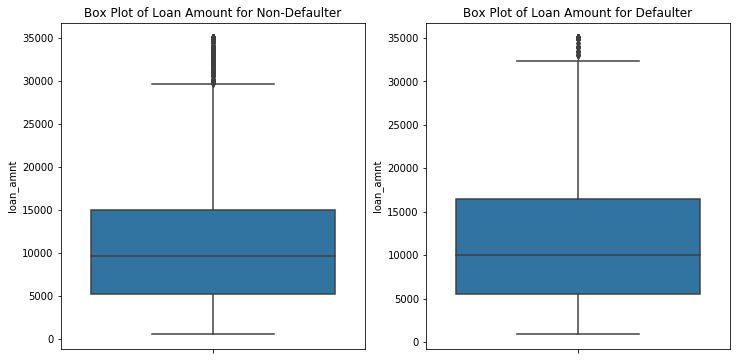

In [19]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['loan_amnt'])
plt.title('Box Plot of Loan Amount for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y = df_default['loan_amnt'])
plt.title('Box Plot of Loan Amount for Defaulter')

plt.show()

### Detailed Analysis

In [20]:
df_not_default['loan_amnt'].describe()

count    32916.000000
mean     10873.159710
std       7199.570647
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [21]:
# Getting the upper-limit of outliers for loan_amnt in df_not_default

In [22]:
15000.000000 + 1.5 * (15000.000000 - 5200.000000)

29700.0

In [23]:
df_default['loan_amnt'].describe()

count     5611.000000
mean     12123.556407
std       8085.754851
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [24]:
# Getting the upper-limit of outliers for loan_amnt in df_default

In [25]:
16500.000000 + 1.5 * (16500.000000 - 5600.000000)

32850.0

# It can be concluded that if the loan_amnt is in the range 29700.0-32850.0, there are higher chances for the borrower to be a DEFAULTER

# 2. funded_amnt

## Bar Plot

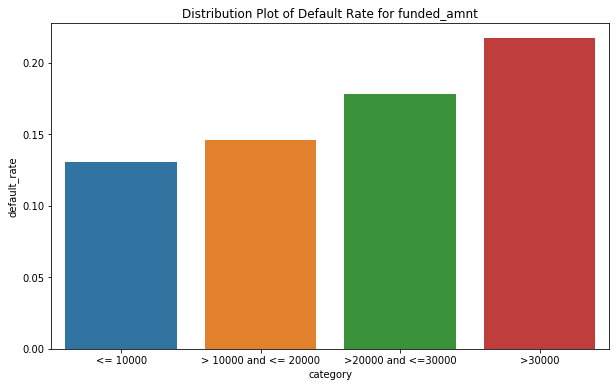

In [26]:
dd_1 = (df_default.loc[(df_default.funded_amnt <= 10000),:]).shape[0]/(df_continuous.loc[(df_continuous.funded_amnt <= 10000),:]).shape[0]
dd_2 = (df_default.loc[(df_default.funded_amnt > 10000) & (df_default.funded_amnt <= 20000),:]).shape[0]/(df_continuous.loc[(df_continuous.funded_amnt > 10000) & (df_continuous.funded_amnt <= 20000),:]).shape[0]
dd_3 = (df_default.loc[(df_default.funded_amnt > 20000) & (df_default.funded_amnt <= 30000),:]).shape[0]/(df_continuous.loc[(df_continuous.funded_amnt > 20000) & (df_continuous.funded_amnt <= 30000),:]).shape[0]
dd_4 = (df_default.loc[(df_default.funded_amnt > 30000)]).shape[0]/(df_continuous.loc[(df_continuous.funded_amnt > 30000)]).shape[0]
df_defaultdd = pd.DataFrame({'category':['<= 10000','> 10000 and <= 20000', '>20000 and <=30000', '>30000'], 'default_rate':[dd_1, dd_2, dd_3, dd_4]})

plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'default_rate', data = df_defaultdd)
plt.title('Distribution Plot of Default Rate for funded_amnt')

plt.show()

# It can be concluded that for funded_amnt > 30000, there are higher chances of the borrower to be a DEFAULTER

## Box_Plot

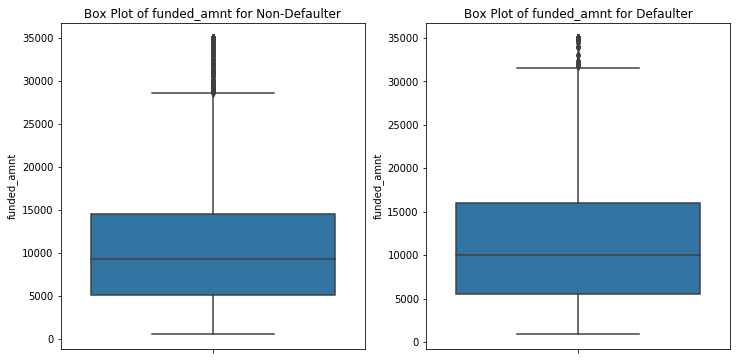

In [27]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['funded_amnt'])
plt.title('Box Plot of funded_amnt for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y = df_default['funded_amnt'])
plt.title('Box Plot of funded_amnt for Defaulter')

plt.show()

## Detailed Analysis

In [28]:
df_not_default['funded_amnt'].describe()

count    32916.000000
mean     10624.968101
std       6955.965592
min        500.000000
25%       5100.000000
50%       9225.000000
75%      14500.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [29]:
# Getting the upper-limit of outliers for funded_amnt in df_not_default

In [30]:
14500.000000 + 1.5*(14500.000000 - 5100.000000)

28600.0

In [31]:
df_default['funded_amnt'].describe()

count     5611.000000
mean     11771.569239
std       7760.440127
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [32]:
# Getting the upper-limit of outliers for funded_amnt in df_default

In [33]:
16000.000000 + 1.5*(16000.000000 - 5600.000000)

31600.0

# It can be concluded that if the funded_amnt is in the range 28600.0-31600.0, there are higher chances for the borrower to be a DEFAULTER

# 3. funded_amnt_inv

## Bar Plot

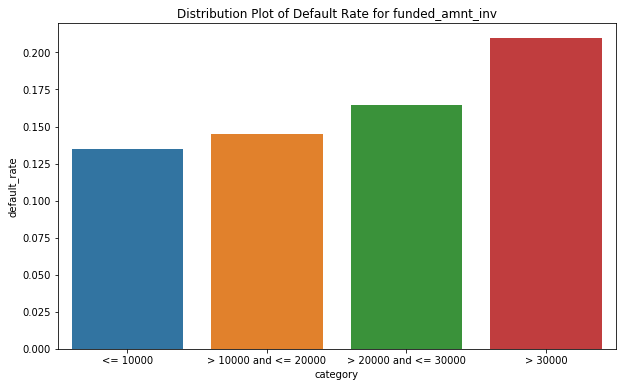

In [34]:
dd_1 = (df_default.loc[(df_default.funded_amnt_inv <= 10000),:]).shape[0]/(df_continuous.loc[(df_continuous.funded_amnt_inv <= 10000),:]).shape[0]
dd_2 = (df_default.loc[(df_default.funded_amnt_inv > 10000) & (df_default.funded_amnt_inv <= 20000),:]).shape[0]/(df_continuous.loc[(df_continuous.funded_amnt_inv > 10000) & (df_continuous.funded_amnt_inv <= 20000),:]).shape[0]
dd_3 = (df_default.loc[(df_default.funded_amnt_inv > 20000) & (df_default.funded_amnt_inv <= 30000),:]).shape[0]/(df_continuous.loc[(df_continuous.funded_amnt_inv > 20000) & (df_continuous.funded_amnt_inv <= 30000),:]).shape[0]
dd_4 = (df_default.loc[(df_default.funded_amnt_inv > 30000)]).shape[0]/(df_continuous.loc[(df_continuous.funded_amnt_inv > 30000)]).shape[0]
df_defaultdd = pd.DataFrame({'category':['<= 10000','> 10000 and <= 20000', '> 20000 and <= 30000', '> 30000'], 'default_rate':[dd_1, dd_2, dd_3, dd_4]})

plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'default_rate', data = df_defaultdd)
plt.title('Distribution Plot of Default Rate for funded_amnt_inv')

plt.show()

# It can be concluded that for funded_amnt_inv > 30000, there are higher chances of the borrower to be a DEFAULTER

## Box-Plot

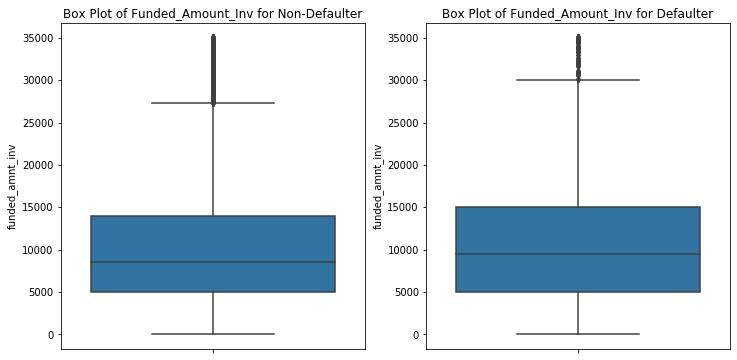

In [35]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['funded_amnt_inv'])
plt.title('Box Plot of Funded_Amount_Inv for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y = df_default['funded_amnt_inv'])
plt.title('Box Plot of Funded_Amount_Inv for Defaulter')

plt.show()

## Detailed Analysis

In [36]:
df_not_default['funded_amnt_inv'].describe()

count    32916.000000
mean     10119.415103
std       6901.749589
min          0.000000
25%       5000.000000
50%       8544.599932
75%      13950.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [37]:
# Getting the upper-limit of outliers for funded_amnt_inv in df_not_default

In [38]:
13950.000000 + 1.5 * (13950.000000 - 5000.000000)

27375.0

In [39]:
df_default['funded_amnt_inv'].describe()

count     5611.000000
mean     10885.182943
std       7661.941310
min          0.000000
25%       5000.000000
50%       9475.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [40]:
# Getting the upper-limit of outliers for funded_amnt_inv in df_default

In [41]:
15000.000000 + 1.5 * (15000.000000 - 5000.000000)

30000.0

# It can be concluded that if the funded_amnt_inv is in range 27375.0-30000.0, there are higher chances for the borrower to be a DEFAULTER

# 4. int_rate

## Bar Plot

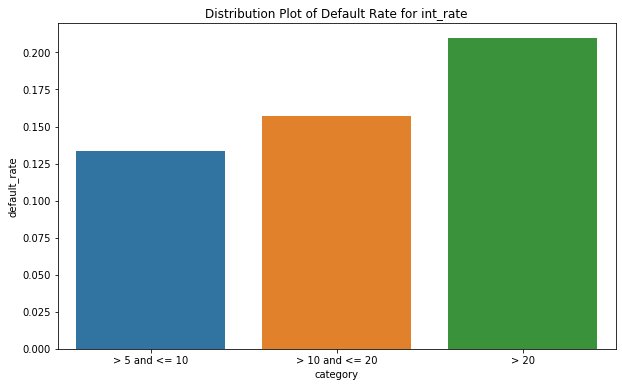

In [42]:
dd_1 = (df_default.loc[(df_default.int_rate > 5) & (df_default.int_rate <= 10),:]).shape[0]/(df_continuous.loc[(df_continuous.int_rate > 5) & (df_continuous.int_rate <= 10),:]).shape[0]
dd_2 = (df_default.loc[(df_default.int_rate > 10) & (df_default.int_rate <= 15),:]).shape[0]/(df_continuous.loc[(df_continuous.int_rate > 10) & (df_continuous.int_rate <= 15),:]).shape[0]
dd_3 = (df_default.loc[(df_default.int_rate > 15)]).shape[0]/(df_continuous.loc[(df_continuous.int_rate > 15)]).shape[0]
df_defaultdd = pd.DataFrame({'category':['> 5 and <= 10','> 10 and <= 20', '> 20'], 'default_rate':[dd_1, dd_3, dd_4]})

plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'default_rate', data = df_defaultdd)
plt.title('Distribution Plot of Default Rate for int_rate')

plt.show()

# It can be concluded that for int_rate > 20%, there are higher chances of the borrower to be a DEFAULTER

## Box-Plot

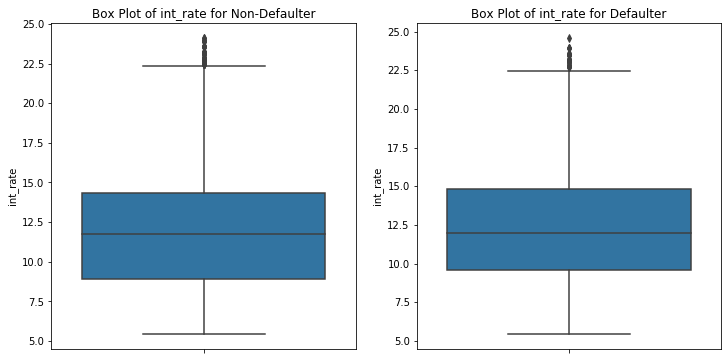

In [43]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['int_rate'])
plt.title('Box Plot of int_rate for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y = df_default['int_rate'])
plt.title('Box Plot of int_rate for Defaulter')

plt.show()

# No conclusion can be drawn.

# 5. installment

# Bar Plot

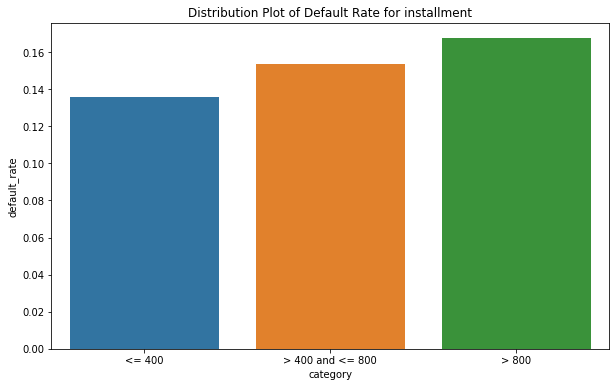

In [44]:
dd_1 = (df_default.loc[(df_default.installment <= 400),:]).shape[0]/(df_continuous.loc[(df_continuous.installment <= 400),:]).shape[0]
dd_2 = (df_default.loc[(df_default.installment > 400) & (df_default.installment <= 800),:]).shape[0]/(df_continuous.loc[(df_continuous.installment > 400) & (df_continuous.installment <= 800),:]).shape[0]
dd_3 = (df_default.loc[(df_default.installment > 800),:]).shape[0]/(df_continuous.loc[(df_continuous.installment > 800),:]).shape[0]

df_defaultdd = pd.DataFrame({'category':['<= 400','> 400 and <= 800', '> 800'], 'default_rate':[dd_1, dd_2, dd_3]})

plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'default_rate', data = df_defaultdd)
plt.title('Distribution Plot of Default Rate for installment')

plt.show()

# It can be concluded that for installment > 800, there are higher chances of the borrower to be a DEFAULTER

## Box-Plot

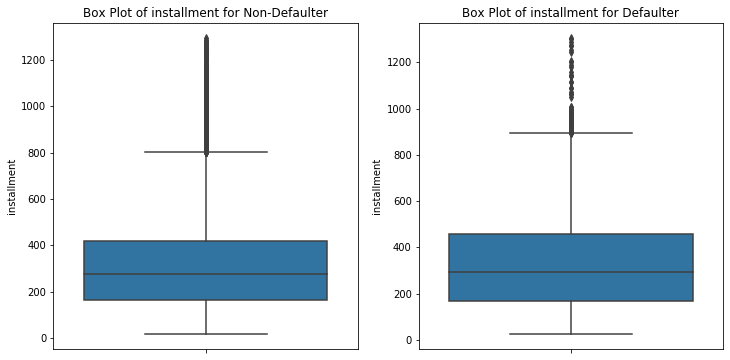

In [45]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['installment'])
plt.title('Box Plot of installment for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y = df_default['installment'])
plt.title('Box Plot of installment for Defaulter')

plt.show()

## Detailed Analysis 

In [46]:
df_not_default['installment'].describe()

count    32916.000000
mean       320.297966
std        207.086805
min         15.690000
25%        165.380000
50%        275.770000
75%        421.150000
max       1295.210000
Name: installment, dtype: float64

In [47]:
# Getting the upper-limit of outliers for installment in df_not_default

In [48]:
421.150000 + 1.5 * (421.150000 - 165.380000)

804.805

In [49]:
df_default['installment'].describe()

count    5611.000000
mean      336.644539
std       217.083260
min        22.790000
25%       168.720000
50%       294.650000
75%       458.425000
max      1305.190000
Name: installment, dtype: float64

In [50]:
# Getting the upper-limit of outliers for installment in df_default

In [51]:
458.425000 + 1.5 * (458.425000 - 168.720000)

892.9825000000001

# It can be concluded that if the installment is in the range 804.80-892.98, there are higher chances for the borrower to be a DEFAULTER

# 6. annual_inc

## Bar Plot

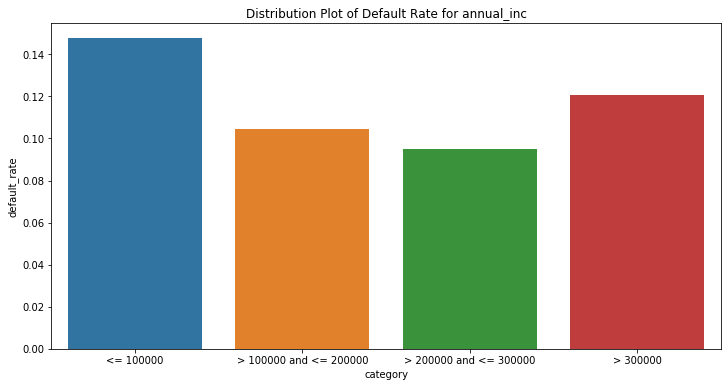

In [52]:
dd_1 = (df_default.loc[(df_default.annual_inc <= 100000),:]).shape[0]/(df_continuous.loc[(df_continuous.annual_inc <= 100000),:]).shape[0]
dd_2 = (df_default.loc[(df_default.annual_inc > 100000) & (df_default.annual_inc <= 200000),:]).shape[0]/(df_continuous.loc[(df_continuous.annual_inc > 100000) & (df_continuous.annual_inc <= 200000),:]).shape[0]
dd_3 = (df_default.loc[(df_default.annual_inc > 200000) & (df_default.annual_inc <= 300000),:]).shape[0]/(df_continuous.loc[(df_continuous.annual_inc > 200000) & (df_continuous.annual_inc <= 300000),:]).shape[0]
dd_4 = (df_default.loc[(df_default.annual_inc > 300000),:]).shape[0]/(df_continuous.loc[(df_continuous.annual_inc > 300000),:]).shape[0]
                            
df_defaultdd = pd.DataFrame({'category':['<= 100000','> 100000 and <= 200000', '> 200000 and <= 300000', '> 300000'], 
                             'default_rate':[dd_1, dd_2, dd_3, dd_4]})

plt.figure(figsize = (12,6))
sns.barplot(x = 'category', y = 'default_rate', data = df_defaultdd)
plt.title('Distribution Plot of Default Rate for annual_inc')

plt.show()

# It can be concluded that for annual_inc <= 100000, there are higher chances of the borrower to be a DEFAULTER

## Box-Plot

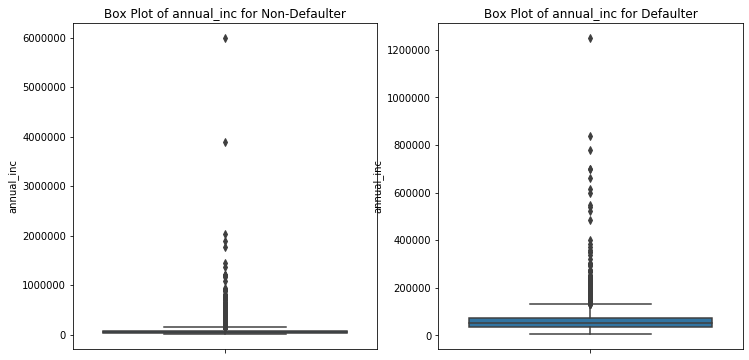

In [53]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['annual_inc'])
plt.title('Box Plot of annual_inc for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y = df_default['annual_inc'])
plt.title('Box Plot of annual_inc for Defaulter')

plt.show()

## Detailed Analysis

In [54]:
df_not_default['annual_inc'].describe()

count    3.291600e+04
mean     6.988263e+04
std      6.655077e+04
min      4.000000e+03
25%      4.129500e+04
50%      6.000000e+04
75%      8.400000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [55]:
# Getting the upper-limit of outliers for installment in df_not_default

In [56]:
8.400000e+04 + 1.5*(8.400000e+04 - 4.129500e+04)

148057.5

In [57]:
df_default['annual_inc'].describe()

count    5.611000e+03
mean     6.251227e+04
std      4.780950e+04
min      4.080000e+03
25%      3.700000e+04
50%      5.300000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64

In [58]:
# Getting the upper-limit of outliers for installment in df_default

In [59]:
7.500000e+04 + 1.5*(7.500000e+04 - 3.700000e+04)

132000.0

# It can be concluded that if the annual_inc is in the range 132000.0-148057.5, there are higher chances for the borrower to be a NON-DEFAULTER

# 7. dti

# Bar Plot

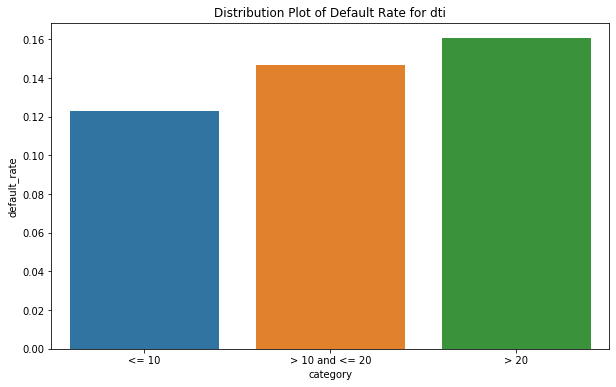

In [60]:
dd_1 = (df_default.loc[(df_default.dti <= 10),:]).shape[0]/(df_continuous.loc[(df_continuous.dti <= 10),:]).shape[0]
dd_2 = (df_default.loc[(df_default.dti > 10) & (df_default.dti <= 20),:]).shape[0]/(df_continuous.loc[(df_continuous.dti > 10) & (df_continuous.dti <= 20),:]).shape[0]
dd_3 = (df_default.loc[(df_default.dti > 20),:]).shape[0]/(df_continuous.loc[(df_continuous.dti > 20),:]).shape[0]
                            
df_defaultdd = pd.DataFrame({'category':['<= 10','> 10 and <= 20', '> 20'], 
                             'default_rate':[dd_1, dd_2, dd_3]})

plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'default_rate', data = df_defaultdd)
plt.title('Distribution Plot of Default Rate for dti')

plt.show()

# It can be concluded that for dti > 20, there are higher chances of the borrower to be a DEFAULTER

## Box-Plot

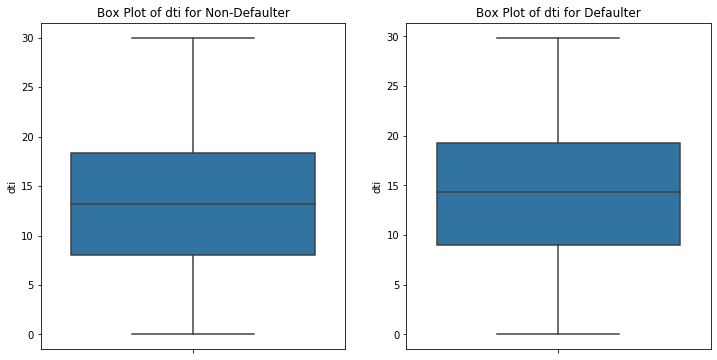

In [61]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['dti'])
plt.title('Box Plot of dti for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y = df_default['dti'])
plt.title('Box Plot of dti for Defaulter')

plt.show()

# No conclusion can be drawn.

# 8. mths_since_last_delinq

## Bar Plot

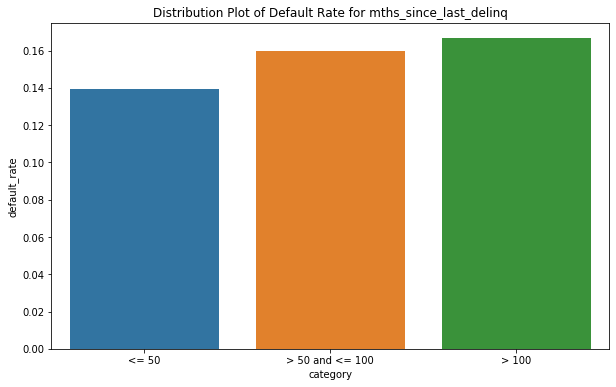

In [62]:
dd_1 = (df_default.loc[(df_default.mths_since_last_delinq <= 50),:]).shape[0]/(df_continuous.loc[(df_continuous.mths_since_last_delinq <= 50),:]).shape[0]
dd_2 = (df_default.loc[(df_default.mths_since_last_delinq > 50) & (df_default.mths_since_last_delinq <= 100),:]).shape[0]/(df_continuous.loc[(df_continuous.mths_since_last_delinq > 50) & (df_continuous.mths_since_last_delinq <= 100),:]).shape[0]
dd_3 = (df_default.loc[(df_default.mths_since_last_delinq > 100),:]).shape[0]/(df_continuous.loc[(df_continuous.mths_since_last_delinq > 100),:]).shape[0]
                            
df_defaultdd = pd.DataFrame({'category':['<= 50','> 50 and <= 100', '> 100'], 
                             'default_rate':[dd_1, dd_2, dd_3]})

plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'default_rate', data = df_defaultdd)
plt.title('Distribution Plot of Default Rate for mths_since_last_delinq')

plt.show()

# It can be concluded that for mths_since_last_delinq > 100, there are higher chances of the borrower to be a DEFAULTER

## Box-Plot

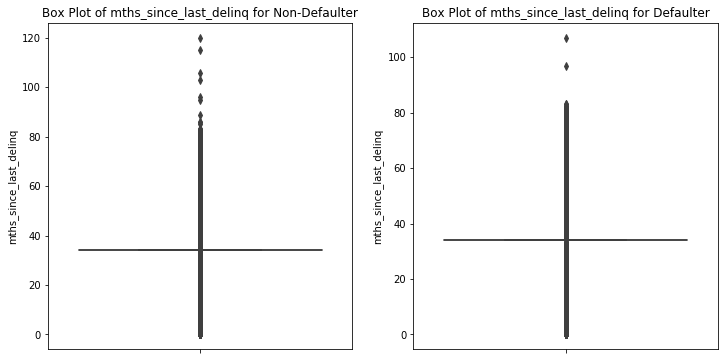

In [63]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['mths_since_last_delinq'])
plt.title('Box Plot of mths_since_last_delinq for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y = df_default['mths_since_last_delinq'])
plt.title('Box Plot of mths_since_last_delinq for Defaulter')

plt.show()

## Detailed Analysis

In [64]:
df_not_default['mths_since_last_delinq'].describe()

count    32916.000000
mean        34.639780
std         12.988832
min          0.000000
25%         34.000000
50%         34.000000
75%         34.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [65]:
df_default['mths_since_last_delinq'].describe()

count    5611.000000
mean       34.820531
std        14.032114
min         0.000000
25%        34.000000
50%        34.000000
75%        34.000000
max       107.000000
Name: mths_since_last_delinq, dtype: float64

# No conclusion can be drawn.

# 10. open_acc

## Bar Plot

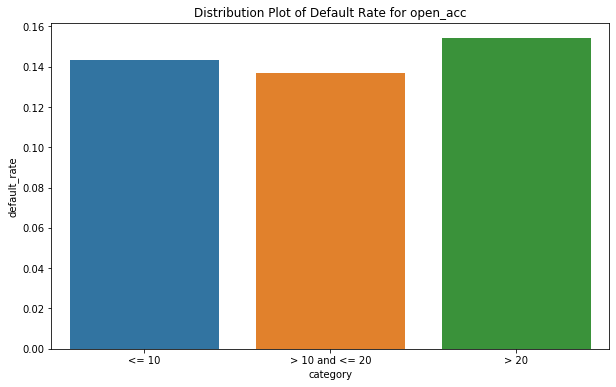

In [66]:
dd_1 = (df_default.loc[(df_default.open_acc <= 10),:]).shape[0]/(df_continuous.loc[(df_continuous.open_acc <= 10),:]).shape[0]
dd_2 = (df_default.loc[(df_default.open_acc > 10) & (df_default.open_acc <= 20),:]).shape[0]/(df_continuous.loc[(df_continuous.open_acc > 10) & (df_continuous.open_acc <= 20),:]).shape[0]
dd_3 = (df_default.loc[(df_default.open_acc > 20),:]).shape[0]/(df_continuous.loc[(df_continuous.open_acc > 20),:]).shape[0]
                            
df_defaultdd = pd.DataFrame({'category':['<= 10','> 10 and <= 20', '> 20'], 
                             'default_rate':[dd_1, dd_2, dd_3]})

plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'default_rate', data = df_defaultdd)
plt.title('Distribution Plot of Default Rate for open_acc')

plt.show()

# It can be concluded that for open_acc > 20, there are higher chances of the borrower to be a DEFAULTER

## Box-Plot

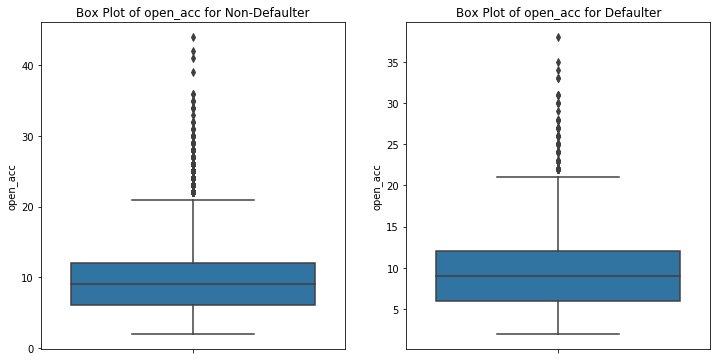

In [67]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['open_acc'])
plt.title('Box Plot of open_acc for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y = df_default['open_acc'])
plt.title('Box Plot of open_acc for Defaulter')

plt.show()

## Detailed Analysis

In [68]:
df_not_default['open_acc'].describe()

count    32916.000000
mean         9.296421
std          4.378947
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [69]:
# Getting the upper-limit of outliers for installment in df_not_default

In [70]:
12.000000 + 1.5 * (12.000000 - 6.000000)

21.0

In [71]:
df_default['open_acc'].describe()

count    5611.000000
mean        9.193370
std         4.521984
min         2.000000
25%         6.000000
50%         9.000000
75%        12.000000
max        38.000000
Name: open_acc, dtype: float64

In [72]:
# Getting the upper-limit of outliers for installment in df_default

In [73]:
12.000000 + 1.5 * (12.000000 - 6.000000)

21.0

# No conclusion can be drawn.

# 11. revol_bal

## Bar Plot

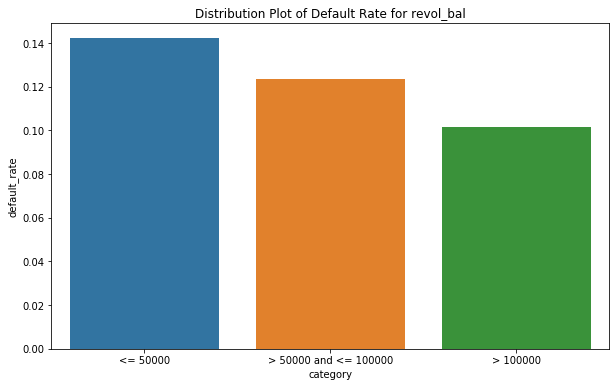

In [74]:
dd_1 = (df_default.loc[(df_default.revol_bal <= 50000),:]).shape[0]/(df_continuous.loc[(df_continuous.revol_bal <= 50000),:]).shape[0]
dd_2 = (df_default.loc[(df_default.revol_bal > 50000) & (df_default.revol_bal <= 100000),:]).shape[0]/(df_continuous.loc[(df_continuous.revol_bal > 50000) & (df_continuous.revol_bal <= 100000),:]).shape[0]
dd_3 = (df_default.loc[(df_default.revol_bal > 100000),:]).shape[0]/(df_continuous.loc[(df_continuous.revol_bal > 100000),:]).shape[0]
                            
df_defaultdd = pd.DataFrame({'category':['<= 50000','> 50000 and <= 100000', '> 100000'], 
                             'default_rate':[dd_1, dd_2, dd_3]})

plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'default_rate', data = df_defaultdd)
plt.title('Distribution Plot of Default Rate for revol_bal')

plt.show()

# It can be concluded that for revol_bal <= 50000, there are higher chances of the borrower to be a DEFAULTER

## Box-Plot

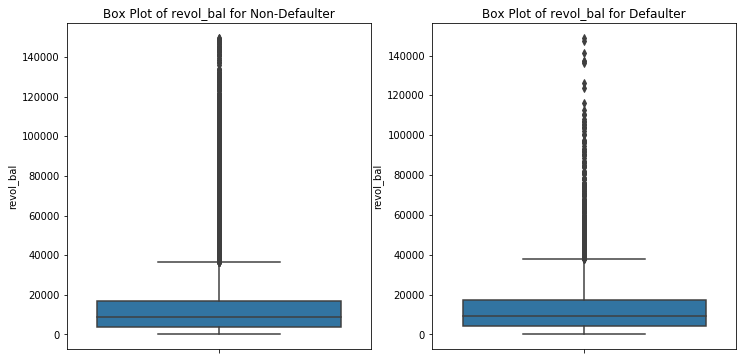

In [75]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['revol_bal'])
plt.title('Box Plot of revol_bal for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y = df_default['revol_bal'])
plt.title('Box Plot of revol_bal for Defaulter')

plt.show()

## Detailed Analysis

In [76]:
df_not_default['revol_bal'].describe()

count     32916.000000
mean      13263.299368
std       15984.772484
min           0.000000
25%        3612.000000
50%        8694.000000
75%       16827.750000
max      149588.000000
Name: revol_bal, dtype: float64

In [77]:
# Getting the upper-limit of outliers for installment in df_not_default

In [78]:
16827.750000 + 1.5 * (16827.750000 - 3612.000000)

36651.375

In [79]:
df_default['revol_bal'].describe()

count      5611.000000
mean      13552.780075
std       15168.517401
min           0.000000
25%        4007.000000
50%        9253.000000
75%       17553.500000
max      148829.000000
Name: revol_bal, dtype: float64

In [80]:
# Getting the upper-limit of outliers for installment in df_default

In [81]:
17553.500000 + 1.5 * (17553.500000 - 4007.000000)

37873.25

# It can be concluded that if the revol_bal is in range 36651.38-37873.25, there are higher chances for the borrower to be a DEFAULTER

# 12. revol_util

## Bar Plot

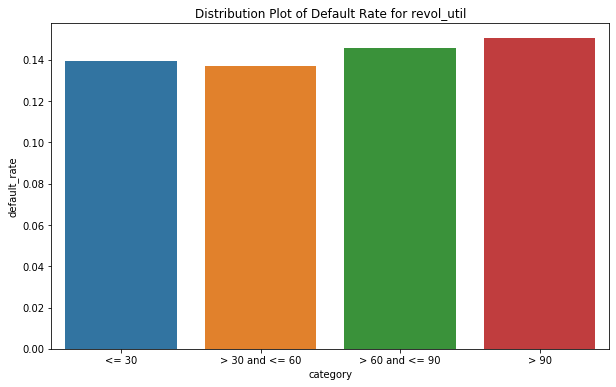

In [82]:
dd_1 = (df_default.loc[(df_default.revol_util <= 30),:]).shape[0]/(df_continuous.loc[(df_continuous.revol_util <= 30),:]).shape[0]
dd_2 = (df_default.loc[(df_default.revol_util > 30) & (df_default.revol_util <= 60),:]).shape[0]/(df_continuous.loc[(df_continuous.revol_util > 30) & (df_continuous.revol_util <= 60),:]).shape[0]
dd_3 = (df_default.loc[(df_default.revol_util > 60) & (df_default.revol_util <= 90),:]).shape[0]/(df_continuous.loc[(df_continuous.revol_util > 60) & (df_continuous.revol_util <= 90),:]).shape[0]
dd_4 = (df_default.loc[(df_default.revol_util > 90),:]).shape[0]/(df_continuous.loc[(df_continuous.revol_util > 90),:]).shape[0]
                            
df_defaultdd = pd.DataFrame({'category':['<= 30','> 30 and <= 60', '> 60 and <= 90', '> 90'], 
                             'default_rate':[dd_1, dd_2, dd_3, dd_4]})

plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'default_rate', data = df_defaultdd)
plt.title('Distribution Plot of Default Rate for revol_util')

plt.show()

# It can be concluded that for revol_util > 90, there are higher chances of the borrower to be a DEFAULTER

## Box-Plot

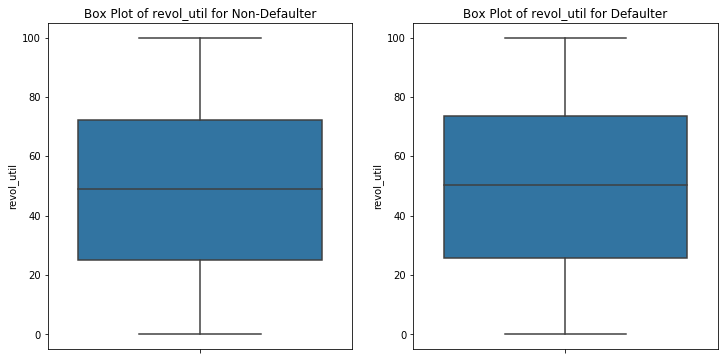

In [83]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['revol_util'])
plt.title('Box Plot of revol_util for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y=df_default['revol_util'])
plt.title('Box Plot of revol_util for Defaulter')

plt.show()

# No conclusion can be drawn.

# 13. total_acc

## Bar Plot

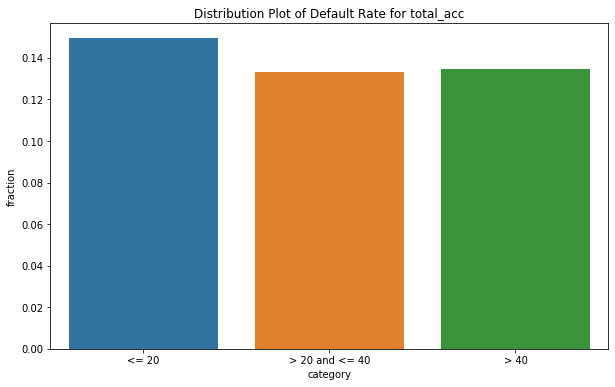

In [84]:
dd_1 = (df_default.loc[(df_default.total_acc <= 20),:]).shape[0]/(df_continuous.loc[(df_continuous.total_acc <= 20),:]).shape[0]
dd_2 = (df_default.loc[(df_default.total_acc > 20) & (df_default.total_acc <= 40),:]).shape[0]/(df_continuous.loc[(df_continuous.total_acc > 20) & (df_continuous.total_acc <= 40),:]).shape[0]
dd_3 = (df_default.loc[(df_default.total_acc > 40),:]).shape[0]/(df_continuous.loc[(df_continuous.total_acc > 40),:]).shape[0]
                            
df_defaultdd = pd.DataFrame({'category':['<= 20','> 20 and <= 40', '> 40'], 
                             'fraction':[dd_1, dd_2, dd_3]})

plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'fraction', data = df_defaultdd)
plt.title('Distribution Plot of Default Rate for total_acc')

plt.show()

# It can be concluded that for total_acc <= 20, there are higher chances of the borrower to be a DEFAULTER

## Box-Plot

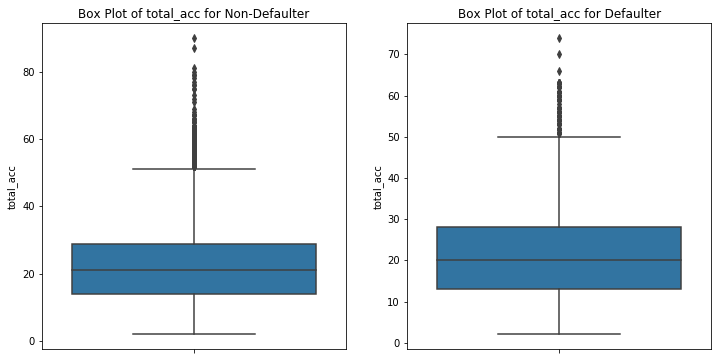

In [85]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['total_acc'])
plt.title('Box Plot of total_acc for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y = df_default['total_acc'])
plt.title('Box Plot of total_acc for Defaulter')

plt.show()

## Detailed Analysis

In [86]:
df_not_default['total_acc'].describe()

count    32916.000000
mean        22.171467
std         11.415477
min          2.000000
25%         14.000000
50%         21.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

In [87]:
# Getting the upper-limit of outliers for total_acc in df_not_default

In [88]:
29.000000 + 1.5 * (29.000000 - 14.000000)

51.5

In [89]:
df_default['total_acc'].describe()

count    5611.000000
mean       21.458385
std        11.445843
min         2.000000
25%        13.000000
50%        20.000000
75%        28.000000
max        74.000000
Name: total_acc, dtype: float64

In [90]:
# Getting the upper-limit of outliers for total_acc in df_default

In [91]:
28.000000 + 1.5 * (28.000000 - 13.000000)

50.5

# It can be concluded that if the total_acc is in range 50.5-51.5, there are higher chances for the borrower to be a NON-DEFAULTER

# 14. out_prncp

## Box_Plot

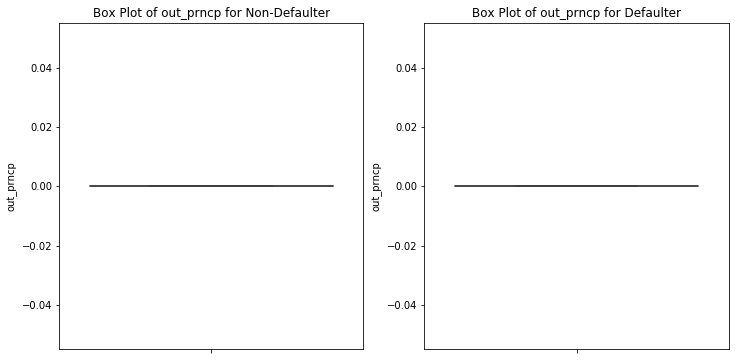

In [92]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['out_prncp'])
plt.title('Box Plot of out_prncp for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y = df_default['out_prncp'])
plt.title('Box Plot of out_prncp for Defaulter')

plt.show()

# No conclusion can be drawn. Hence, out_prncp is not an important feature in this context

# 15. out_prncp_inv

## Box-Plot

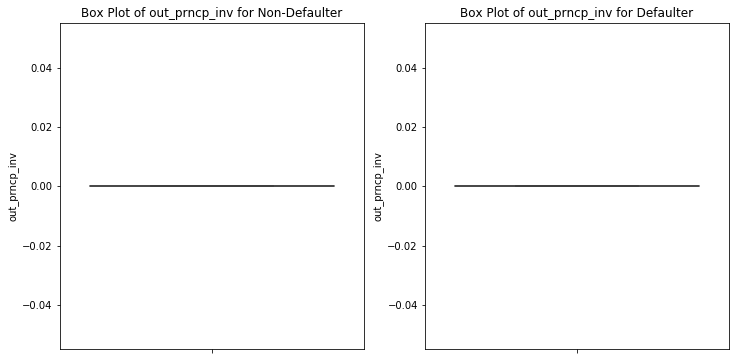

In [93]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['out_prncp_inv'])
plt.title('Box Plot of out_prncp_inv for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y = df_default['out_prncp_inv'])
plt.title('Box Plot of out_prncp_inv for Defaulter')

plt.show()

# No conclusion can be drawn. Hence, out_prncp_inv is not an important feature in this context

# 16. total_pymnt

## Bar Plot

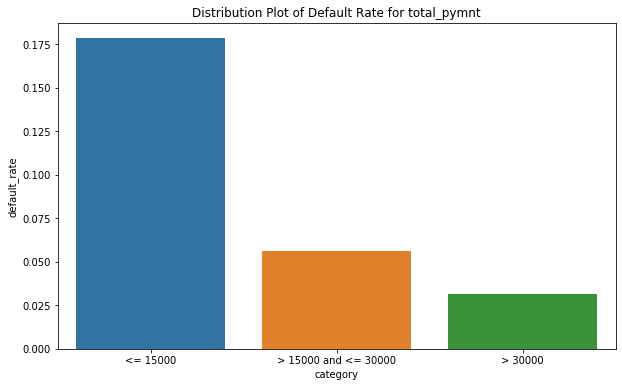

In [94]:
dd_1 = (df_default.loc[(df_default.total_pymnt <= 15000),:]).shape[0]/(df_continuous.loc[(df_continuous.total_pymnt <= 15000),:]).shape[0]
dd_2 = (df_default.loc[(df_default.total_pymnt > 15000) & (df_default.total_pymnt <= 30000),:]).shape[0]/(df_continuous.loc[(df_continuous.total_pymnt > 15000) & (df_continuous.total_pymnt <= 30000),:]).shape[0]
dd_3 = (df_default.loc[(df_default.total_pymnt > 30000),:]).shape[0]/(df_continuous.loc[(df_continuous.total_pymnt > 30000),:]).shape[0]
                            
df_defaultdd = pd.DataFrame({'category':['<= 15000','> 15000 and <= 30000', '> 30000'], 
                             'default_rate':[dd_1, dd_2, dd_3]})

plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'default_rate', data = df_defaultdd)
plt.title('Distribution Plot of Default Rate for total_pymnt')

plt.show()

# It can be concluded that for total_pymnt <= 15000, there are higher chances of the borrower to be a DEFAULTER

## Box_Plot

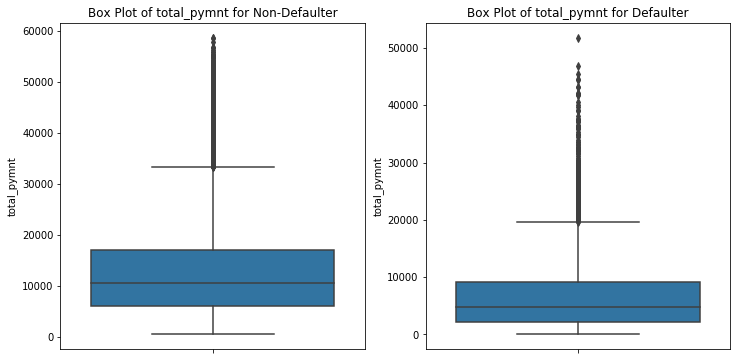

In [95]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['total_pymnt'])
plt.title('Box Plot of total_pymnt for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y = df_default['total_pymnt'])
plt.title('Box Plot of total_pymnt for Defaulter')

plt.show()

In [96]:
df_not_default['total_pymnt'].describe()

count    32916.000000
mean     12733.361999
std       8851.382127
min        526.332241
25%       6146.015803
50%      10694.629360
75%      17031.923322
max      58563.679930
Name: total_pymnt, dtype: float64

In [97]:
# Getting the upper-limit of outliers for total_acc in df_not_default

In [98]:
17031.923322 + 1.5*(17031.923322 - 6146.015803)

33360.784600499996

In [99]:
df_default['total_pymnt'].describe()

count     5611.000000
mean      6850.593710
std       6619.913865
min          0.000000
25%       2222.850000
50%       4850.820000
75%       9201.130000
max      51745.450000
Name: total_pymnt, dtype: float64

In [100]:
# Getting the upper-limit of outliers for total_acc in df_default

In [101]:
9201.130000 + 1.5*(9201.130000 - 2222.850000)

19668.549999999996

# It can be concluded that if total_pymnt is in the range 19668.55-33360.78, then there are higher chances that the borrower is a NON-DEFAULTER

# 17. total_pymnt_inv

## Bar Plot

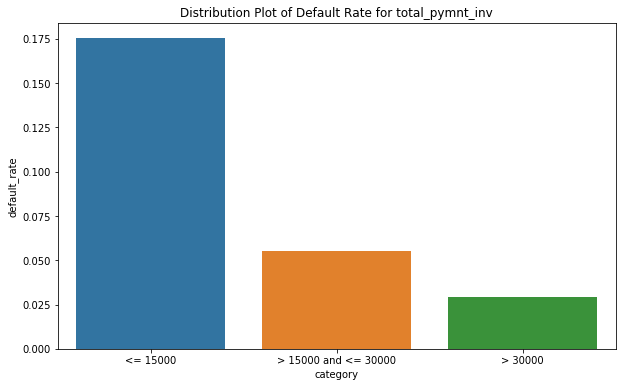

In [102]:
dd_1 = (df_default.loc[(df_default.total_pymnt_inv <= 15000),:]).shape[0]/(df_continuous.loc[(df_continuous.total_pymnt_inv <= 15000),:]).shape[0]
dd_2 = (df_default.loc[(df_default.total_pymnt_inv > 15000) & (df_default.total_pymnt_inv <= 30000),:]).shape[0]/(df_continuous.loc[(df_continuous.total_pymnt_inv > 15000) & (df_continuous.total_pymnt_inv <= 30000),:]).shape[0]
dd_3 = (df_default.loc[(df_default.total_pymnt_inv > 30000),:]).shape[0]/(df_continuous.loc[(df_continuous.total_pymnt_inv > 30000),:]).shape[0]
                            
df_defaultdd = pd.DataFrame({'category':['<= 15000','> 15000 and <= 30000', '> 30000'], 
                             'default_rate':[dd_1, dd_2, dd_3]})

plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'default_rate', data = df_defaultdd)
plt.title('Distribution Plot of Default Rate for total_pymnt_inv')

plt.show()

# It can be concluded that for total_pymnt <= 15000, there are higher chances of the borrower to be a DEFAULTER

## Box-Plot

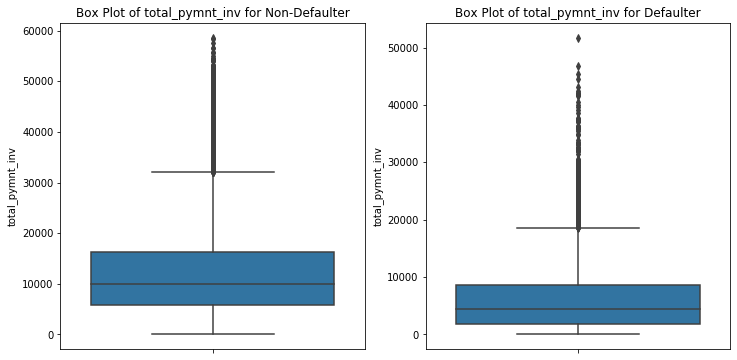

In [103]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['total_pymnt_inv'])
plt.title('Box Plot of total_pymnt_inv for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y = df_default['total_pymnt_inv'])
plt.title('Box Plot of total_pymnt_inv for Defaulter')

plt.show()

## Detailed Analysis

In [104]:
df_not_default['total_pymnt_inv'].describe()

count    32916.000000
mean     12116.354657
std       8754.409869
min          0.000000
25%       5735.460000
50%      10000.625000
75%      16298.302500
max      58563.680000
Name: total_pymnt_inv, dtype: float64

In [105]:
# Getting the upper-limit of outliers for total_acc in df_not_default

In [106]:
16298.302500 + 1.5*(16298.302500 - 5735.460000)

32142.566249999996

In [107]:
df_default['total_pymnt_inv'].describe()

count     5611.000000
mean      6380.644846
std       6494.627113
min          0.000000
25%       1870.280000
50%       4363.330000
75%       8564.230000
max      51671.580000
Name: total_pymnt_inv, dtype: float64

In [108]:
# Getting the upper-limit of outliers for total_acc in df_default

In [109]:
8564.230000 + 1.5 * (8564.230000 - 1870.280000)

18605.155

# It can be concluded that if total_pymnt_inv is in the range 18605.15-32142.57, then there are higher chances that the borrower is a NON-DEFAULTER

# 18. total_rec_prncp

## Bar Plot

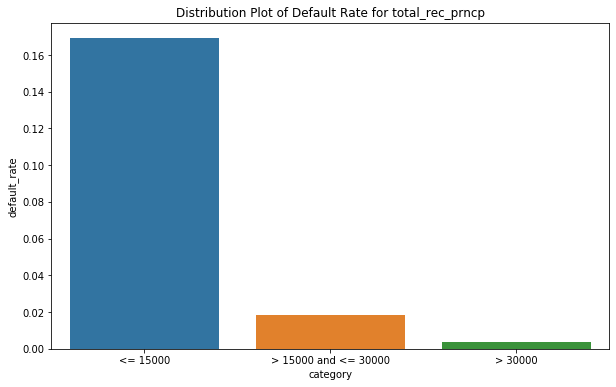

In [110]:
dd_1 = (df_default.loc[(df_default.total_rec_prncp <= 15000),:]).shape[0]/(df_continuous.loc[(df_continuous.total_rec_prncp <= 15000),:]).shape[0]
dd_2 = (df_default.loc[(df_default.total_rec_prncp > 15000) & (df_default.total_rec_prncp <= 30000),:]).shape[0]/(df_continuous.loc[(df_continuous.total_rec_prncp > 15000) & (df_continuous.total_rec_prncp <= 30000),:]).shape[0]
dd_3 = (df_default.loc[(df_default.total_rec_prncp > 30000),:]).shape[0]/(df_continuous.loc[(df_continuous.total_rec_prncp > 30000),:]).shape[0]
                            
df_defaultdd = pd.DataFrame({'category':['<= 15000','> 15000 and <= 30000', '> 30000'], 
                             'default_rate':[dd_1, dd_2, dd_3]})

plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'default_rate', data = df_defaultdd)
plt.title('Distribution Plot of Default Rate for total_rec_prncp')

plt.show()

# It can be concluded that for total_rec_prncp <= 15000, there are higher chances of the borrower to be a DEFAULTER

## Box-Plot

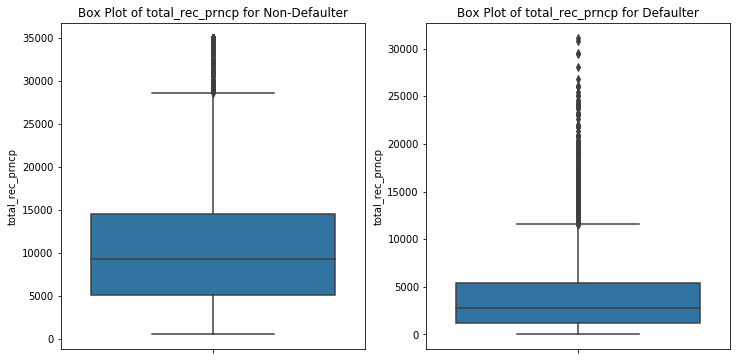

In [111]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['total_rec_prncp'])
plt.title('Box Plot of total_rec_prncp for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y = df_default['total_rec_prncp'])
plt.title('Box Plot of total_rec_prncp for Defaulter')

plt.show()

## Detailed Analysis

In [112]:
df_not_default['total_rec_prncp'].describe()

count    32916.000000
mean     10624.961785
std       6955.960065
min        500.000000
25%       5100.000000
50%       9225.000000
75%      14500.000000
max      35000.020000
Name: total_rec_prncp, dtype: float64

In [113]:
# Getting the upper-limit of outliers for total_rec_prncp in df_not_default

In [114]:
14500.000000 + 1.5*(14500.000000 - 5100.000000)

28600.0

In [115]:
df_default['total_rec_prncp'].describe()

count     5611.000000
mean      3974.557742
std       3965.725074
min          0.000000
25%       1210.200000
50%       2736.490000
75%       5357.225000
max      31115.810000
Name: total_rec_prncp, dtype: float64

In [116]:
# Getting the upper-limit of outliers for total_rec_prncp in df_default

In [117]:
5357.225000 + 1.5*(5357.225000 - 1210.200000)

11577.7625

# It can be concluded that if total_rec_prncp is in range 11577.76-28600.0, then there are higher chances that the borrower is a NON-DEFAULTER

# 19. total_rec_int

## Bar Plot

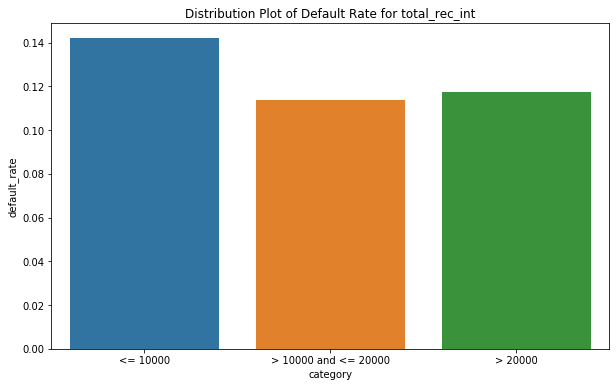

In [118]:
dd_1 = (df_default.loc[(df_default.total_rec_int <= 10000),:]).shape[0]/(df_continuous.loc[(df_continuous.total_rec_int <= 10000),:]).shape[0]
dd_2 = (df_default.loc[(df_default.total_rec_int > 10000) & (df_default.total_rec_int <= 20000),:]).shape[0]/(df_continuous.loc[(df_continuous.total_rec_int > 10000) & (df_continuous.total_rec_int <= 20000),:]).shape[0]
dd_3 = (df_default.loc[(df_default.total_rec_int > 20000),:]).shape[0]/(df_continuous.loc[(df_continuous.total_rec_int > 20000),:]).shape[0]
                            
df_defaultdd = pd.DataFrame({'category':['<= 10000','> 10000 and <= 20000', '> 20000'], 
                             'default_rate':[dd_1, dd_2, dd_3]})

plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'default_rate', data = df_defaultdd)
plt.title('Distribution Plot of Default Rate for total_rec_int')

plt.show()

# It can be concluded that for total_rec_int <= 10000, there are higher chances of the borrower to be a DEFAULTER

## Box-Plot

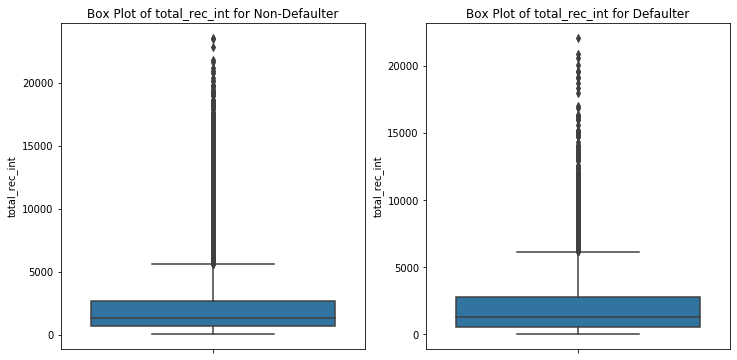

In [119]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['total_rec_int'])
plt.title('Box Plot of total_rec_int for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y = df_default['total_rec_int'])
plt.title('Box Plot of total_rec_int for Defaulter')

plt.show()

## Detailed Analysis

In [120]:
df_not_default['total_rec_int'].describe()

count    32916.000000
mean      2107.531335
std       2361.239480
min          6.220000
25%        659.897500
50%       1302.035000
75%       2650.145000
max      23563.680000
Name: total_rec_int, dtype: float64

In [121]:
# Getting the upper-limit of outliers for total_rec_int in df_not_default

In [122]:
2650.145000 + 1.5*(2650.145000 - 659.897500)

5635.516250000001

In [123]:
df_default['total_rec_int'].describe()

count     5611.000000
mean      2198.789980
std       2553.905803
min          0.000000
25%        558.370000
50%       1291.380000
75%       2805.225000
max      22122.300000
Name: total_rec_int, dtype: float64

In [124]:
# Getting the upper-limit of outliers for total_rec_int in df_default

In [125]:
2805.225000 + 1.5*(2805.225000 - 558.370000)

6175.5075

# It can be concluded that if total_rec_int is in range 5635.52-6175.51, then there are higher chances that the borrower is a DEFAULTER

# 20. total_rec_late_fee

## Bar Plot

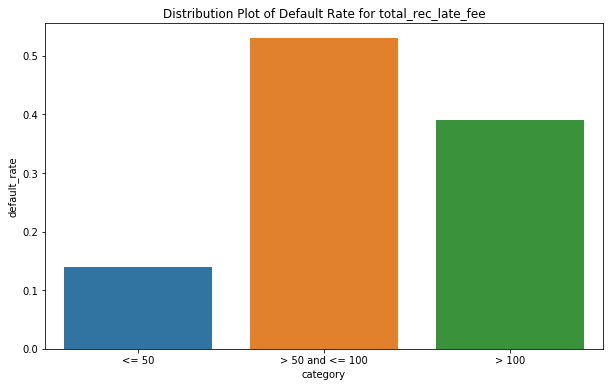

In [126]:
dd_1 = (df_default.loc[(df_default.total_rec_late_fee <= 50),:]).shape[0]/(df_continuous.loc[(df_continuous.total_rec_late_fee <= 50),:]).shape[0]
dd_2 = (df_default.loc[(df_default.total_rec_late_fee > 50) & (df_default.total_rec_late_fee <= 100),:]).shape[0]/(df_continuous.loc[(df_continuous.total_rec_late_fee > 50) & (df_continuous.total_rec_late_fee <= 100),:]).shape[0]
dd_3 = (df_default.loc[(df_default.total_rec_late_fee > 100),:]).shape[0]/(df_continuous.loc[(df_continuous.total_rec_late_fee > 100),:]).shape[0]
                            
df_defaultdd = pd.DataFrame({'category':['<= 50','> 50 and <= 100', '> 100'], 
                             'default_rate':[dd_1, dd_2, dd_3]})

plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'default_rate', data = df_defaultdd)
plt.title('Distribution Plot of Default Rate for total_rec_late_fee')

plt.show()

# It can be concluded that for total_rec_late_fee in range 50-100 (100 included), there are higher chances of the borrower to be a DEFAULTER

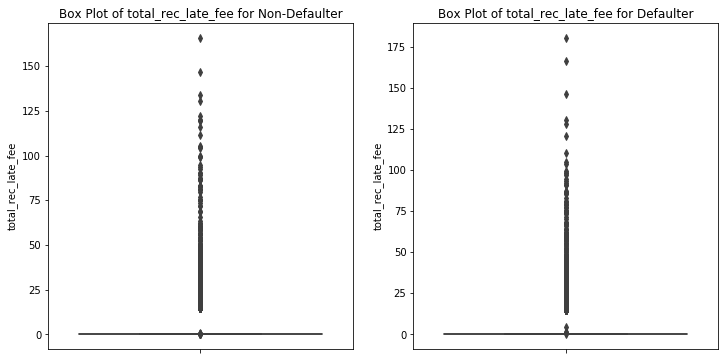

In [127]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['total_rec_late_fee'])
plt.title('Box Plot of total_rec_late_fee for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y = df_default['total_rec_late_fee'])
plt.title('Box Plot of total_rec_late_fee for Defaulter')

plt.show()

# No conclusion can be drawn.

# 21. recoveries

## Bar Plot

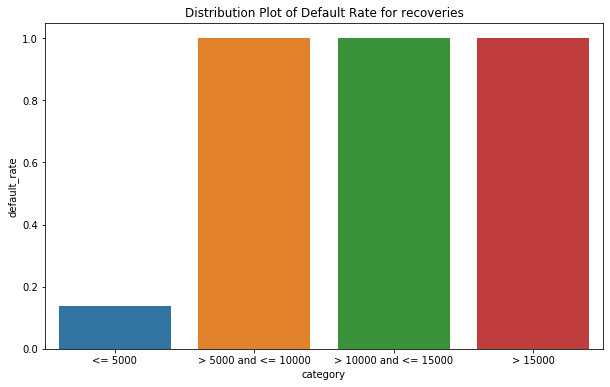

In [128]:
dd_1 = (df_default.loc[(df_default.recoveries <= 5000),:]).shape[0]/(df_continuous.loc[(df_continuous.recoveries <= 5000),:]).shape[0]
dd_2 = (df_default.loc[(df_default.recoveries > 5000) & (df_default.recoveries <= 10000),:]).shape[0]/(df_continuous.loc[(df_continuous.recoveries > 5000) & (df_continuous.recoveries <= 10000),:]).shape[0]
dd_3 = (df_default.loc[(df_default.recoveries > 10000) & (df_default.recoveries <= 15000),:]).shape[0]/(df_continuous.loc[(df_continuous.recoveries > 10000) & (df_continuous.recoveries <= 15000),:]).shape[0]
dd_4 = (df_default.loc[(df_default.recoveries > 15000),:]).shape[0]/(df_continuous.loc[(df_continuous.recoveries > 15000),:]).shape[0]
                            
df_defaultdd = pd.DataFrame({'category':['<= 5000','> 5000 and <= 10000', '> 10000 and <= 15000', '> 15000'], 
                             'default_rate':[dd_1, dd_2, dd_3, dd_4]})

plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'default_rate', data = df_defaultdd)
plt.title('Distribution Plot of Default Rate for recoveries')

plt.show()

# It can be concluded that for recoveries > 5000, there are higher chances of the borrower to be a DEFAULTER

## Box-Plot

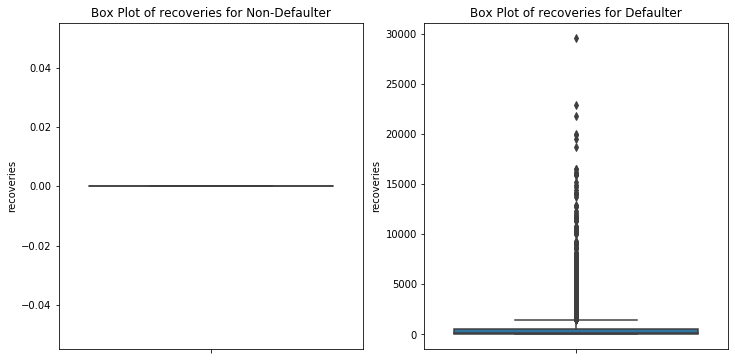

In [129]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['recoveries'])
plt.title('Box Plot of recoveries for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y = df_default['recoveries'])
plt.title('Box Plot of recoveries for Defaulter')

plt.show()

# It can be concluded that if the recoveries is greater than 0 then there are chances that the borrower is a DEFAULTER.

# 22. collection_recovery_fee

## Bar Plot

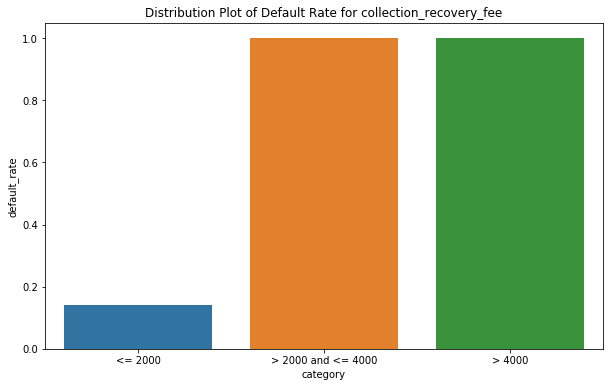

In [130]:
dd_1 = (df_default.loc[(df_default.collection_recovery_fee <= 2000),:]).shape[0]/(df_continuous.loc[(df_continuous.collection_recovery_fee <= 2000),:]).shape[0]
dd_2 = (df_default.loc[(df_default.collection_recovery_fee > 2000) & (df_default.collection_recovery_fee <= 4000),:]).shape[0]/(df_continuous.loc[(df_continuous.collection_recovery_fee > 2000) & (df_continuous.collection_recovery_fee <= 4000),:]).shape[0]
dd_3 = (df_default.loc[(df_default.collection_recovery_fee > 4000),:]).shape[0]/(df_continuous.loc[(df_continuous.collection_recovery_fee > 4000),:]).shape[0]                            

df_defaultdd = pd.DataFrame({'category':['<= 2000','> 2000 and <= 4000', '> 4000'], 
                             'default_rate':[dd_1, dd_2, dd_3]})

plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'default_rate', data = df_defaultdd)
plt.title('Distribution Plot of Default Rate for collection_recovery_fee')

plt.show()

# It can be concluded that for collection_recovery_fee > 2000, there are higher chances of the borrower to be a DEFAULTER

## Box-Plot

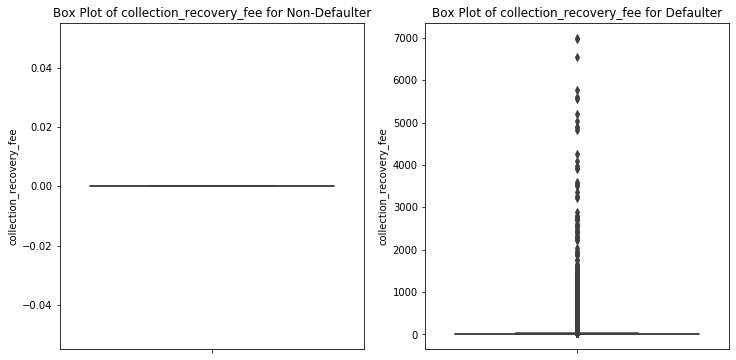

In [131]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['collection_recovery_fee'])
plt.title('Box Plot of collection_recovery_fee for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y = df_default['collection_recovery_fee'])
plt.title('Box Plot of collection_recovery_fee for Defaulter')

plt.show()

# It can be concluded that if the collection_recovery_fee is greater than 0, then there are a few chances that the borrower is a DEFAULTER.

# 23. last_pymnt_amnt

## Bar Plot

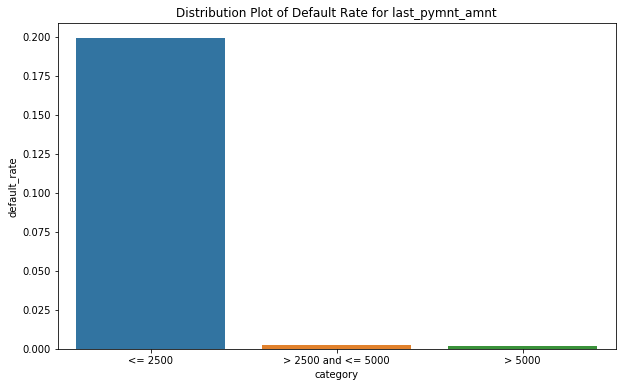

In [132]:
dd_1 = (df_default.loc[(df_default.last_pymnt_amnt <= 2500),:]).shape[0]/(df_continuous.loc[(df_continuous.last_pymnt_amnt <= 2500),:]).shape[0]
dd_2 = (df_default.loc[(df_default.last_pymnt_amnt > 2500) & (df_default.last_pymnt_amnt <= 5000),:]).shape[0]/(df_continuous.loc[(df_continuous.last_pymnt_amnt > 2500) & (df_continuous.last_pymnt_amnt <= 5000),:]).shape[0]
dd_3 = (df_default.loc[(df_default.last_pymnt_amnt > 5000),:]).shape[0]/(df_continuous.loc[(df_continuous.last_pymnt_amnt > 5000),:]).shape[0]
                            
df_defaultdd = pd.DataFrame({'category':['<= 2500','> 2500 and <= 5000', '> 5000'], 
                             'default_rate':[dd_1, dd_2, dd_3]})

plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'default_rate', data = df_defaultdd)
plt.title('Distribution Plot of Default Rate for last_pymnt_amnt')

plt.show()

# It can be concluded that for last_pymnt_amnt <= 2500, there are higher chances of the borrower to be a DEFAULTER

## Box-Plot 

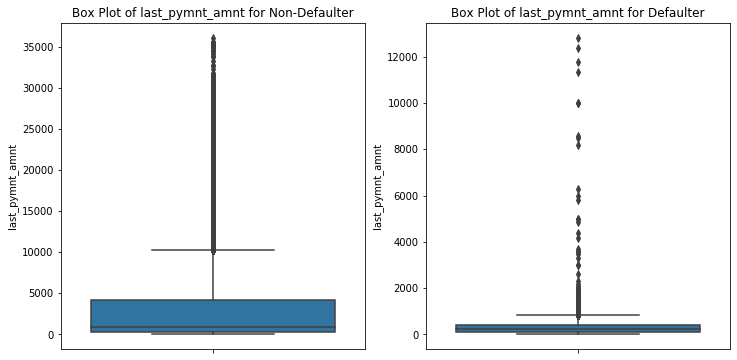

In [133]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = df_not_default['last_pymnt_amnt'])
plt.title('Box Plot of last_pymnt_amnt for Non-Defaulter')

plt.subplot(122)
sns.boxplot(y = df_default['last_pymnt_amnt'])
plt.title('Box Plot of last_pymnt_amnt for Defaulter')

plt.show()

## Detailed Analysis

In [134]:
df_not_default['last_pymnt_amnt'].describe()

count    32916.000000
mean      3162.172912
std       4738.018425
min          0.000000
25%        255.347500
50%        865.070000
75%       4255.205000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64

In [135]:
# Getting the upper-limit of outliers for total_rec_int in df_not_default

In [136]:
4255.205000 + 1.5*(4255.205000 - 255.347500)

10254.99125

In [137]:
df_default['last_pymnt_amnt'].describe()

count     5611.000000
mean       326.573445
std        529.581987
min          0.000000
25%        113.550000
50%        238.730000
75%        406.490000
max      12818.380000
Name: last_pymnt_amnt, dtype: float64

In [138]:
# Getting the upper-limit of outliers for total_rec_int in df_default

In [139]:
406.490000 + 1.5*(406.490000 - 113.550000)

845.9

# It can be concluded that if last_pymnt_amnt is in range 845.9-10254.99, then there are higher chances that the borrower is a NON-DEFAULTER

# --------------------------------------------------------------------------------------------------------------

# Categorical Feature (variable) Analysis

## 1. term
## 2. grade
## 3. sub_grade
## 4. emp_title
## 5. emp_length
## 6. home_ownership
## 7. verification_status_analysis
## 8. issue_d
## 9. purpose
## 10. addr_state
## 11. zip_code
## 12. delinq_2yrs
## 13. earliest_cr_line
## 14. inq_last_6mths
## 15. pub_rec
## 16. last_pymnt_d
## 17. next_pymnt_d
## 18. last_credict_pull_d
## 19. pub_rec_bankruptcies

### Checking for Null Values

In [140]:
null_dict_check = {'term': df.isnull().any(axis = 0)['term'],'grade': df.isnull().any(axis = 0)['grade'], 
             'sub_grade': df.isnull().any(axis = 0)['sub_grade'],
            'emp_title' : df.isnull().any(axis = 0)['emp_title'], 'emp_length' : df.isnull().any(axis = 0)['emp_length'],
            'home_ownership' : df.isnull().any(axis = 0)['home_ownership'], 'verification_status' : df.isnull().any(axis = 0)['verification_status'],
            'issue_d' : df.isnull().any(axis = 0)['issue_d'], 'purpose' : df.isnull().any(axis = 0)['purpose'],
            'addr_state' : df.isnull().any(axis = 0)['addr_state'], 'zip_code' : df.isnull().any(axis = 0)['zip_code'],
            'delinq_2yrs' : df.isnull().any(axis = 0)['delinq_2yrs'], 'earliest_cr_line' : df.isnull().any(axis = 0)['earliest_cr_line'] , 
            'inq_last_6mths' : df.isnull().any(axis = 0)['inq_last_6mths'],'pub_rec' : df.isnull().any(axis = 0)['pub_rec'], 
            'last_pymnt_d' : df.isnull().any(axis = 0)['last_pymnt_d'], 'next_pymnt_d' : df.isnull().any(axis = 0)['next_pymnt_d'],
            'last_credit_pull_d' : df.isnull().any(axis = 0)['last_credit_pull_d'], 'pub_rec_bankruptcies' : df.isnull().any(axis = 0)['pub_rec_bankruptcies']}

In [141]:
null_dict_check

{'term': False,
 'grade': False,
 'sub_grade': False,
 'emp_title': True,
 'emp_length': True,
 'home_ownership': False,
 'verification_status': False,
 'issue_d': False,
 'purpose': False,
 'addr_state': False,
 'zip_code': False,
 'delinq_2yrs': False,
 'earliest_cr_line': False,
 'inq_last_6mths': False,
 'pub_rec': False,
 'last_pymnt_d': True,
 'next_pymnt_d': True,
 'last_credit_pull_d': True,
 'pub_rec_bankruptcies': True}

In [142]:
feature_containing_null = [x for x in null_dict_check if null_dict_check[x] == True]

In [143]:
feature_containing_null

['emp_title',
 'emp_length',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'pub_rec_bankruptcies']

In [144]:
# Finding % of missing values in emp_title
round(100 * (df.isnull().sum()['emp_title'].sum()/len(df.index)),2)

6.19

In [145]:
# Finding % of missing values in emp_length
round(100 * (df.isnull().sum()['emp_length'].sum()/len(df.index)),2)

2.71

In [146]:
# Finding % of missing values in last_pymnt_d
round(100 * (df.isnull().sum()['last_pymnt_d'].sum()/len(df.index)),2)

0.18

In [147]:
# Finding % of missing values in next_pymnt_d
round(100 * (df.isnull().sum()['next_pymnt_d'].sum()/len(df.index)),2)

97.13

In [148]:
# Finding % of missing values in last_credit_pull_d
round(100 * (df.isnull().sum()['last_credit_pull_d'].sum()/len(df.index)),2)

0.01

In [149]:
# Finding % of missing values in pub_rec_bankruptcies
round(100 * (df.isnull().sum()['pub_rec_bankruptcies'].sum()/len(df.index)),2)

1.75

In [150]:
# Imputing NaN with mode
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df['emp_title'] = imp.fit_transform(np.array(df['emp_title']).reshape(-1, 1))
df['emp_length'] = imp.fit_transform(np.array(df['emp_length']).reshape(-1, 1))
df['pub_rec_bankruptcies'] = imp.fit_transform(np.array(df['pub_rec_bankruptcies']).reshape(-1, 1))

In [151]:
# next_pymnt_d is dropped from the analysis as it contains 97.13% NaN values
df_categorical = df.loc[:,[x for x in (list(null_dict_check.keys()) + ['loan_status']) if x != 'next_pymnt_d']]

In [152]:
# As only 0.18% NaN values are there for last_pymnt_d, those rows are removed
df_categorical = df_categorical[df_categorical['last_pymnt_d'].notna()]

# As only 0.01% NaN values are there for last_credit_pull_d, those rows are removed
df_categorical = df_categorical[df_categorical['last_credit_pull_d'].notna()]

In [153]:
# Defaulter for loan_status as charged-off
df_not_default = df_categorical.loc[(df_categorical.loan_status == 'Fully Paid'),:]
df_not_default.reset_index(inplace = True)
df_not_default = df_not_default.iloc[:,1:]

df_default = df_categorical.loc[(df_categorical.loan_status == 'Charged Off'),:]
df_default.reset_index(inplace = True)
df_default = df_default.iloc[:,1:]

# 1. term

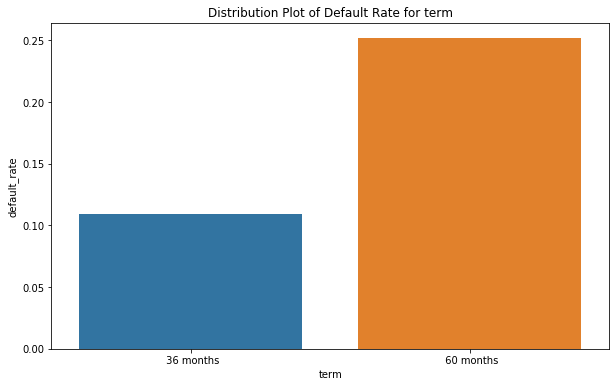

In [154]:
term_analysis = pd.DataFrame(df_not_default.groupby('term')['term'].count())
term_analysis['Not_Defaulter_Count'] = pd.DataFrame(df_not_default.groupby('term')['term'].count())['term']
term_analysis.fillna(0, inplace = True)
term_analysis.drop('term', axis = 1, inplace = True)
term_analysis['Defaulter_Count'] = pd.DataFrame(df_default.groupby('term')['term'].count())['term']
term_analysis.fillna(0, inplace = True)
term_analysis['default_rate'] = term_analysis['Defaulter_Count']/(term_analysis['Not_Defaulter_Count'] + term_analysis['Defaulter_Count'])
term_analysis.reset_index(inplace = True)


plt.figure(figsize = (10,6))
sns.barplot(x = 'term', y = 'default_rate', data = term_analysis)
plt.title('Distribution Plot of Default Rate for term')

plt.show()

# It can be concluded that for term = 60 months, there are higher chances of the borrower to be a DEFAULTER

# 2. grade_analysis

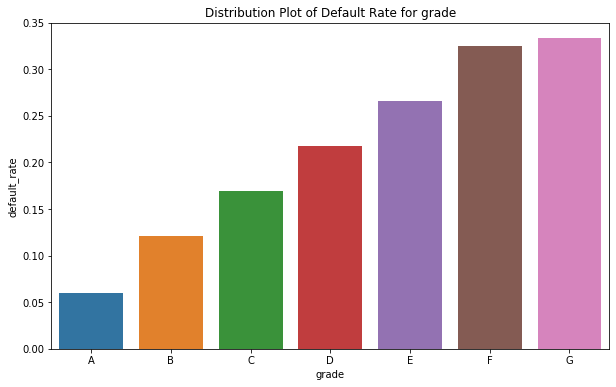

In [155]:
grade_analysis = pd.DataFrame(df_not_default.groupby('grade')['grade'].count())
grade_analysis['Not_Defaulter_Count'] = pd.DataFrame(df_not_default.groupby('grade')['grade'].count())['grade']
grade_analysis.fillna(0, inplace = True)
grade_analysis.drop('grade', axis = 1, inplace = True)
grade_analysis['Defaulter_Count'] = pd.DataFrame(df_default.groupby('grade')['grade'].count())['grade']
grade_analysis.fillna(0, inplace = True)
grade_analysis['default_rate'] = grade_analysis['Defaulter_Count']/(grade_analysis['Not_Defaulter_Count'] + grade_analysis['Defaulter_Count'])
grade_analysis.reset_index(inplace = True)


plt.figure(figsize = (10,6))
sns.barplot(x = 'grade', y = 'default_rate', data = grade_analysis)
plt.title('Distribution Plot of Default Rate for grade')

plt.show()

# It can be concluded that for grade = G, there are higher chances of the borrower to be a DEFAULTER

# 3. sub_grade

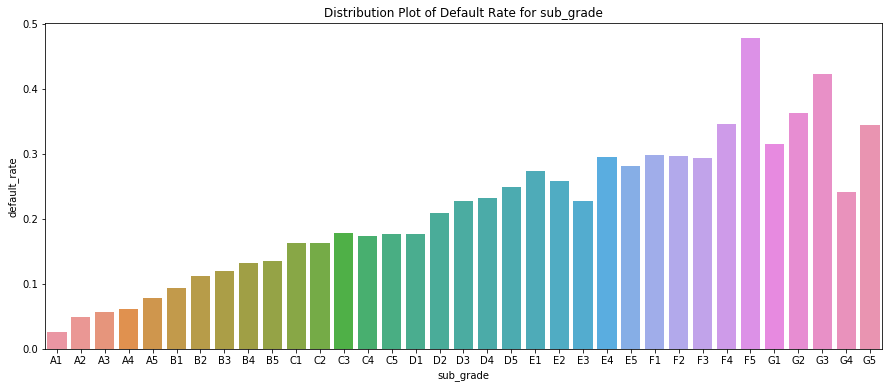

In [156]:
sub_grade_analysis = pd.DataFrame(df_not_default.groupby('sub_grade')['sub_grade'].count())
sub_grade_analysis['Not_Defaulter_Count'] = pd.DataFrame(df_not_default.groupby('sub_grade')['sub_grade'].count())['sub_grade']
sub_grade_analysis.fillna(0, inplace = True)
sub_grade_analysis.drop('sub_grade', axis = 1, inplace = True)
sub_grade_analysis['Defaulter_Count'] = pd.DataFrame(df_default.groupby('sub_grade')['sub_grade'].count())['sub_grade']
sub_grade_analysis.fillna(0, inplace = True)
sub_grade_analysis['default_rate'] = sub_grade_analysis['Defaulter_Count']/(sub_grade_analysis['Not_Defaulter_Count'] + sub_grade_analysis['Defaulter_Count'])
sub_grade_analysis.reset_index(inplace = True)


plt.figure(figsize = (15,6))
sns.barplot(x = 'sub_grade', y = 'default_rate', data = sub_grade_analysis)
plt.title('Distribution Plot of Default Rate for sub_grade')

plt.show()

# It can be concluded that for sub_grade = F5, there are higher chances of the borrower to be a DEFAULTER

# 4. emp_title

In [157]:
emp_title_analysis = pd.DataFrame(df_not_default.groupby('emp_title')['emp_title'].count())
emp_title_analysis['Not_Defaulter_Count'] = pd.DataFrame(df_not_default.groupby('emp_title')['emp_title'].count())['emp_title']
emp_title_analysis.fillna(0, inplace = True)
emp_title_analysis.drop('emp_title', axis = 1, inplace = True)
emp_title_analysis['Defaulter_Count'] = pd.DataFrame(df_default.groupby('emp_title')['emp_title'].count())['emp_title']
emp_title_analysis.fillna(0, inplace = True)
emp_title_analysis['default_rate'] = emp_title_analysis['Defaulter_Count']/(emp_title_analysis['Not_Defaulter_Count'] + emp_title_analysis['Defaulter_Count'])
emp_title_analysis.reset_index(inplace = True)

In [158]:
emp_title_analysis.sort_values(by = 'default_rate', ascending = False, inplace = True)

In [159]:
emp_title_analysis.head()

,emp_title,Not_Defaulter_Count,Defaulter_Count,default_rate
19578,UNITED STATES POSTAL SERVICE,1,3.0,0.750000
10991,Level 3 Communications,1,3.0,0.750000
13069,National Grid,1,3.0,0.750000
2414,Blockbuster,1,2.0,0.666667
23607,shaw group,1,2.0,0.666667


# It can be concluded that for emp_title = 'UNITED STATES POSTAL SERVICE' or 'Level 3 Communications' or 'National Grid', there are higher chances of the borrower to be a DEFAULTER

# 5. emp_length

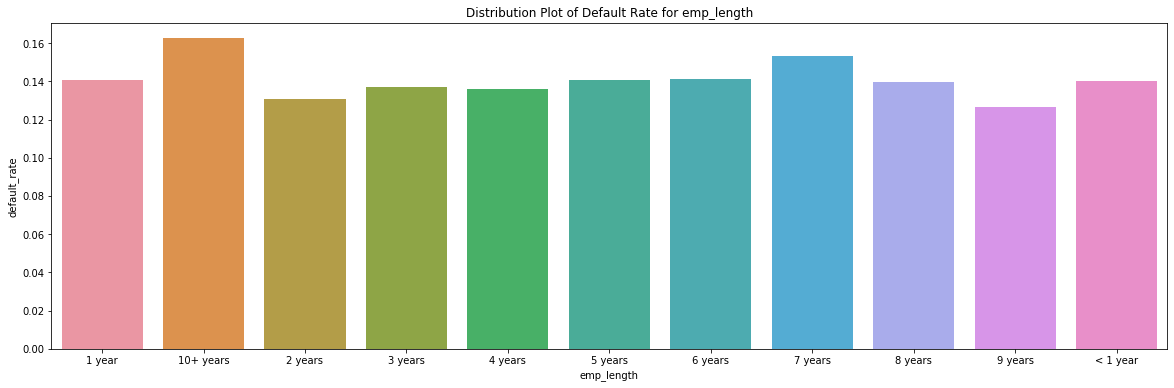

In [160]:
emp_length_analysis = pd.DataFrame(df_not_default.groupby('emp_length')['emp_length'].count())
emp_length_analysis['Not_Defaulter_Count'] = pd.DataFrame(df_not_default.groupby('emp_length')['emp_length'].count())['emp_length']
emp_length_analysis.fillna(0, inplace = True)
emp_length_analysis.drop('emp_length', axis = 1, inplace = True)
emp_length_analysis['Defaulter_Count'] = pd.DataFrame(df_default.groupby('emp_length')['emp_length'].count())['emp_length']
emp_length_analysis.fillna(0, inplace = True)
emp_length_analysis['default_rate'] = emp_length_analysis['Defaulter_Count']/(emp_length_analysis['Not_Defaulter_Count'] + emp_length_analysis['Defaulter_Count'])
emp_length_analysis.reset_index(inplace = True)


plt.figure(figsize = (20,6))
sns.barplot(x = 'emp_length', y = 'default_rate', data = emp_length_analysis)
plt.title('Distribution Plot of Default Rate for emp_length')

plt.show()

# It can be concluded that for emp_length = 10+ years, there are higher chances of the borrower to be a DEFAULTER

# 6. home_ownership

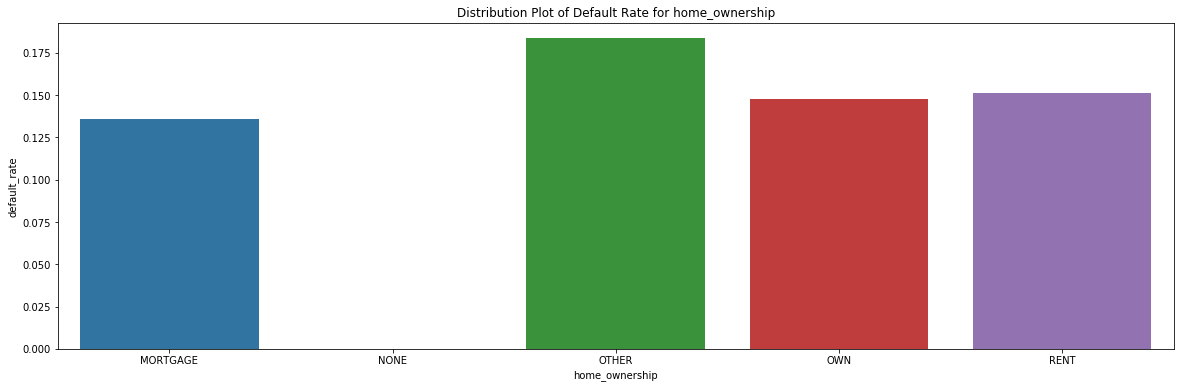

In [161]:
home_ownership_analysis = pd.DataFrame(df_not_default.groupby('home_ownership')['home_ownership'].count())
home_ownership_analysis['Not_Defaulter_Count'] = pd.DataFrame(df_not_default.groupby('home_ownership')['home_ownership'].count())['home_ownership']
home_ownership_analysis.fillna(0, inplace = True)
home_ownership_analysis.drop('home_ownership', axis = 1, inplace = True)
home_ownership_analysis['Defaulter_Count'] = pd.DataFrame(df_default.groupby('home_ownership')['home_ownership'].count())['home_ownership']
home_ownership_analysis.fillna(0, inplace = True)
home_ownership_analysis['default_rate'] = home_ownership_analysis['Defaulter_Count']/(home_ownership_analysis['Not_Defaulter_Count'] + home_ownership_analysis['Defaulter_Count'])
home_ownership_analysis.reset_index(inplace = True)


plt.figure(figsize = (20,6))
sns.barplot(x = 'home_ownership', y = 'default_rate', data = home_ownership_analysis)
plt.title('Distribution Plot of Default Rate for home_ownership')

plt.show()

# It can be concluded that for home_ownership = OTHER, there are higher chances of the borrower to be a DEFAULTER

# 7. verification_status

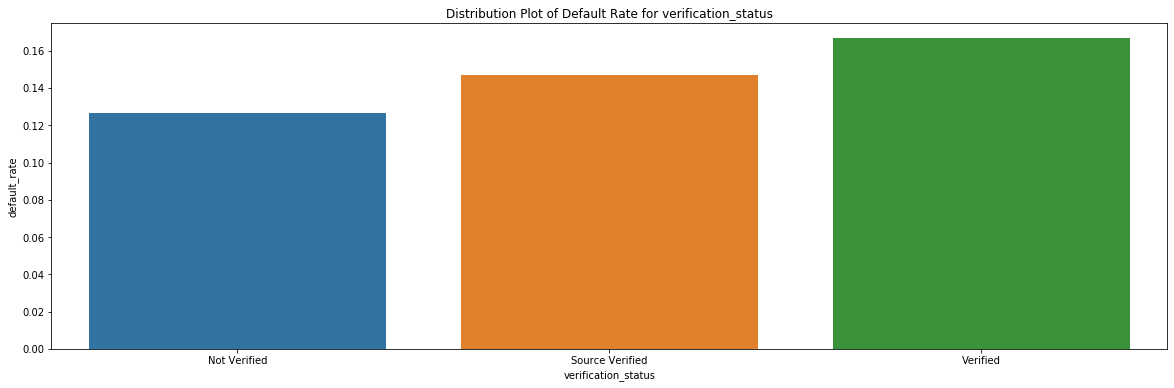

In [162]:
verification_status_analysis = pd.DataFrame(df_not_default.groupby('verification_status')['verification_status'].count())
verification_status_analysis['Not_Defaulter_Count'] = pd.DataFrame(df_not_default.groupby('verification_status')['verification_status'].count())['verification_status']
verification_status_analysis.fillna(0, inplace = True)
verification_status_analysis.drop('verification_status', axis = 1, inplace = True)
verification_status_analysis['Defaulter_Count'] = pd.DataFrame(df_default.groupby('verification_status')['verification_status'].count())['verification_status']
verification_status_analysis.fillna(0, inplace = True)
verification_status_analysis['default_rate'] = verification_status_analysis['Defaulter_Count']/(verification_status_analysis['Not_Defaulter_Count'] + verification_status_analysis['Defaulter_Count'])
verification_status_analysis.reset_index(inplace = True)


plt.figure(figsize = (20,6))
sns.barplot(x = 'verification_status', y = 'default_rate', data = verification_status_analysis)
plt.title('Distribution Plot of Default Rate for verification_status')

plt.show()

# It can be concluded that for verification_status = Verified, there are higher chances of the borrower to be a DEFAULTER

# 8. issue_d

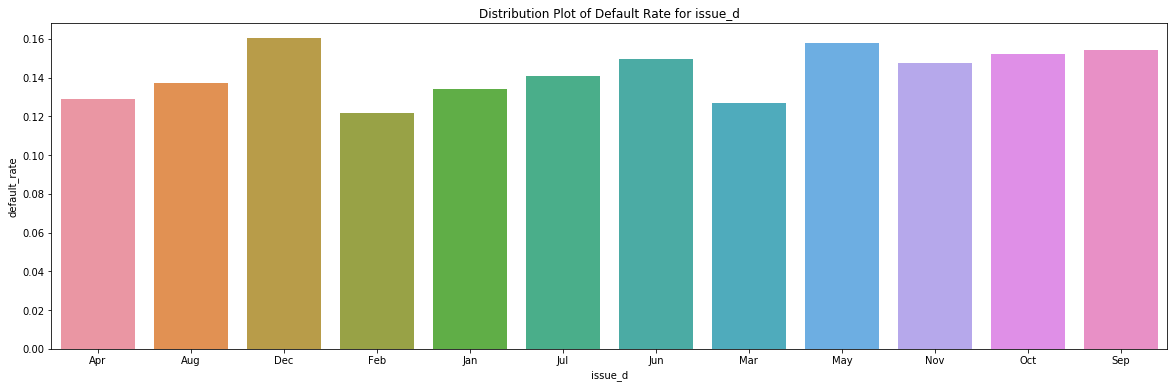

In [163]:
df_not_default['issue_d'] = pd.Series([x.split('-')[0] for x in np.array(df_not_default['issue_d'])])
df_default['issue_d'] = pd.Series([x.split('-')[0] for x in np.array(df_default['issue_d'])])

issue_d_analysis = pd.DataFrame(df_not_default.groupby('issue_d')['issue_d'].count())
issue_d_analysis['Not_Defaulter_Count'] = pd.DataFrame(df_not_default.groupby('issue_d')['issue_d'].count())['issue_d']
issue_d_analysis.fillna(0, inplace = True)
issue_d_analysis.drop('issue_d', axis = 1, inplace = True)
issue_d_analysis['Defaulter_Count'] = pd.DataFrame(df_default.groupby('issue_d')['issue_d'].count())['issue_d']
issue_d_analysis.fillna(0, inplace = True)
issue_d_analysis['default_rate'] = issue_d_analysis['Defaulter_Count']/(issue_d_analysis['Not_Defaulter_Count'] + issue_d_analysis['Defaulter_Count'])
issue_d_analysis.reset_index(inplace = True)


plt.figure(figsize = (20,6))
sns.barplot(x = 'issue_d', y = 'default_rate', data = issue_d_analysis)
plt.title('Distribution Plot of Default Rate for issue_d')

plt.show()

# It can be concluded that for issue_d = 'December', there are higher chances of the borrower to be a DEFAULTER

# 9. purpose

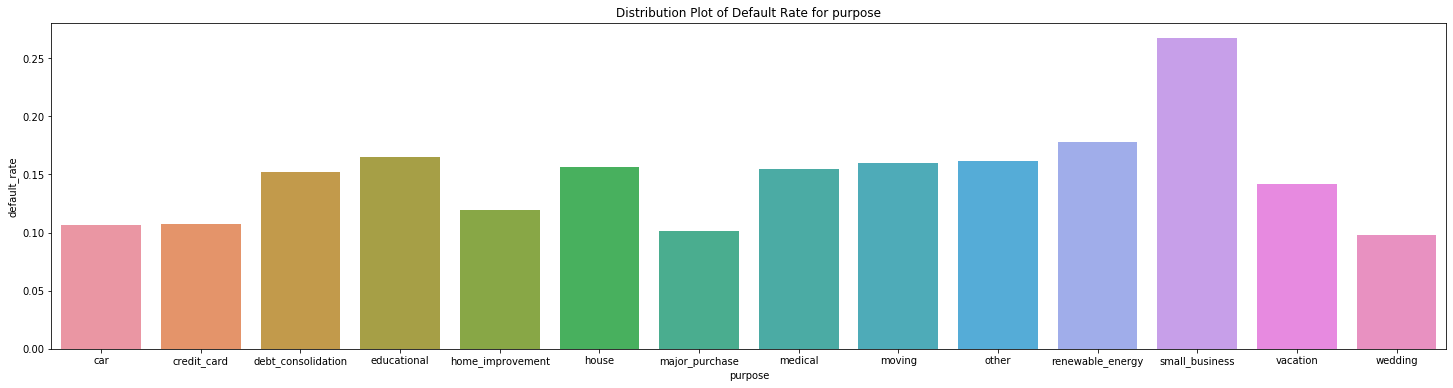

In [164]:
purpose_analysis = pd.DataFrame(df_not_default.groupby('purpose')['purpose'].count())
purpose_analysis['Not_Defaulter_Count'] = pd.DataFrame(df_not_default.groupby('purpose')['purpose'].count())['purpose']
purpose_analysis.fillna(0, inplace = True)
purpose_analysis.drop('purpose', axis = 1, inplace = True)
purpose_analysis['Defaulter_Count'] = pd.DataFrame(df_default.groupby('purpose')['purpose'].count())['purpose']
purpose_analysis.fillna(0, inplace = True)
purpose_analysis['default_rate'] = purpose_analysis['Defaulter_Count']/(purpose_analysis['Not_Defaulter_Count'] + purpose_analysis['Defaulter_Count'])
purpose_analysis.reset_index(inplace = True)


plt.figure(figsize = (25,6))
sns.barplot(x = 'purpose', y = 'default_rate', data = purpose_analysis)
plt.title('Distribution Plot of Default Rate for purpose')

plt.show()

# It can be concluded that for purpose = 'small_business', there are higher chances of the borrower to be a DEFAULTER

# 10. addr_state

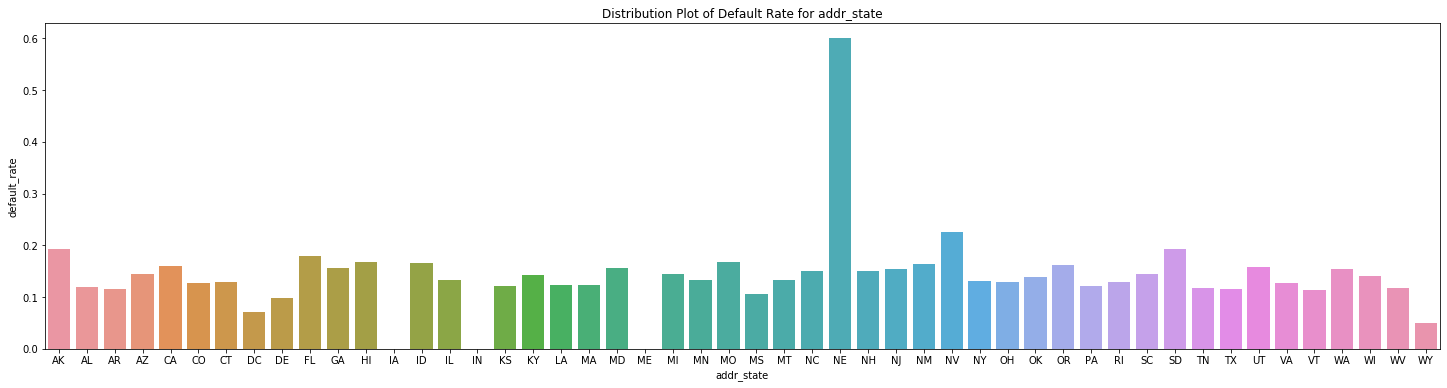

In [165]:
addr_state_analysis = pd.DataFrame(df_not_default.groupby('addr_state')['addr_state'].count())
addr_state_analysis['Not_Defaulter_Count'] = pd.DataFrame(df_not_default.groupby('addr_state')['addr_state'].count())['addr_state']
addr_state_analysis.fillna(0, inplace = True)
addr_state_analysis.drop('addr_state', axis = 1, inplace = True)
addr_state_analysis['Defaulter_Count'] = pd.DataFrame(df_default.groupby('addr_state')['addr_state'].count())['addr_state']
addr_state_analysis.fillna(0, inplace = True)
addr_state_analysis['default_rate'] = addr_state_analysis['Defaulter_Count']/(addr_state_analysis['Not_Defaulter_Count'] + addr_state_analysis['Defaulter_Count'])
addr_state_analysis.reset_index(inplace = True)


plt.figure(figsize = (25,6))
sns.barplot(x = 'addr_state', y = 'default_rate', data = addr_state_analysis)
plt.title('Distribution Plot of Default Rate for addr_state')

plt.show()

# It can be concluded that for addr_state = 'NE', there are higher chances of the borrower to be a DEFAULTER

# 11. zip_code

In [166]:
zip_code_analysis = pd.DataFrame(df_not_default.groupby('zip_code')['zip_code'].count())
zip_code_analysis['Not_Defaulter_Count'] = pd.DataFrame(df_not_default.groupby('zip_code')['zip_code'].count())['zip_code']
zip_code_analysis.fillna(0, inplace = True)
zip_code_analysis.drop('zip_code', axis = 1, inplace = True)
zip_code_analysis['Defaulter_Count'] = pd.DataFrame(df_default.groupby('zip_code')['zip_code'].count())['zip_code']
zip_code_analysis.fillna(0, inplace = True)
zip_code_analysis['default_rate'] = zip_code_analysis['Defaulter_Count']/(zip_code_analysis['Not_Defaulter_Count'] + zip_code_analysis['Defaulter_Count'])
zip_code_analysis.reset_index(inplace = True)

In [167]:
zip_code_analysis.sort_values(by = 'default_rate', ascending = False, inplace = True)

In [168]:
zip_code_analysis.head(5)

,zip_code,Not_Defaulter_Count,Defaulter_Count,default_rate
605,746xx,2,5.0,0.714286
468,561xx,2,5.0,0.714286
566,685xx,1,2.0,0.666667
433,496xx,3,3.0,0.500000
558,673xx,1,1.0,0.500000


# It can be concluded that for zip_code = '746xx' and '561xx', there are higher chances of the borrower to be a DEFAULTER

# 12. delinq_2yrs

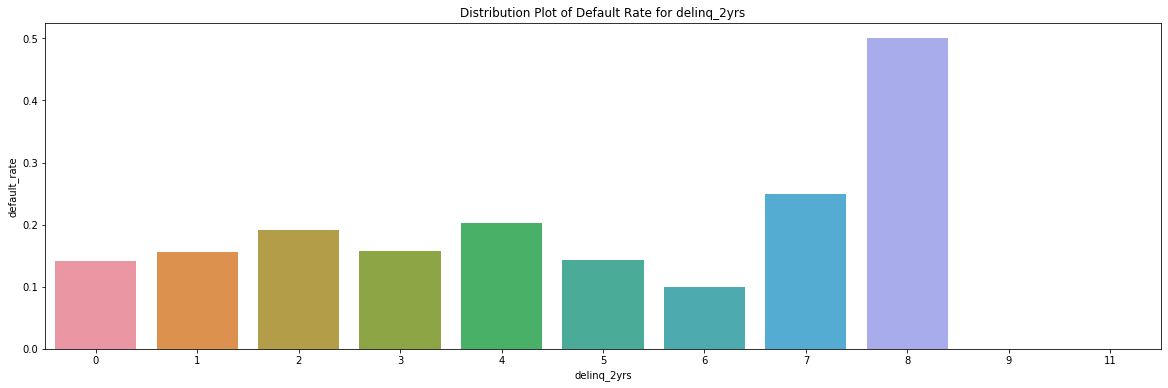

In [169]:
delinq_2yrs_analysis = pd.DataFrame(df_not_default.groupby('delinq_2yrs')['delinq_2yrs'].count())
delinq_2yrs_analysis['Not_Defaulter_Count'] = pd.DataFrame(df_not_default.groupby('delinq_2yrs')['delinq_2yrs'].count())['delinq_2yrs']
delinq_2yrs_analysis.fillna(0, inplace = True)
delinq_2yrs_analysis.drop('delinq_2yrs', axis = 1, inplace = True)
delinq_2yrs_analysis['Defaulter_Count'] = pd.DataFrame(df_default.groupby('delinq_2yrs')['delinq_2yrs'].count())['delinq_2yrs']
delinq_2yrs_analysis.fillna(0, inplace = True)
delinq_2yrs_analysis['default_rate'] = delinq_2yrs_analysis['Defaulter_Count']/(delinq_2yrs_analysis['Not_Defaulter_Count'] + delinq_2yrs_analysis['Defaulter_Count'])
delinq_2yrs_analysis.reset_index(inplace = True)


plt.figure(figsize = (20,6))
sns.barplot(x = 'delinq_2yrs', y = 'default_rate', data = delinq_2yrs_analysis)
plt.title('Distribution Plot of Default Rate for delinq_2yrs')

plt.show()

# It can be concluded that for delinq_2yrs = 8, there are higher chances of the borrower to be a DEFAULTER

# 13. earliest_cr_line

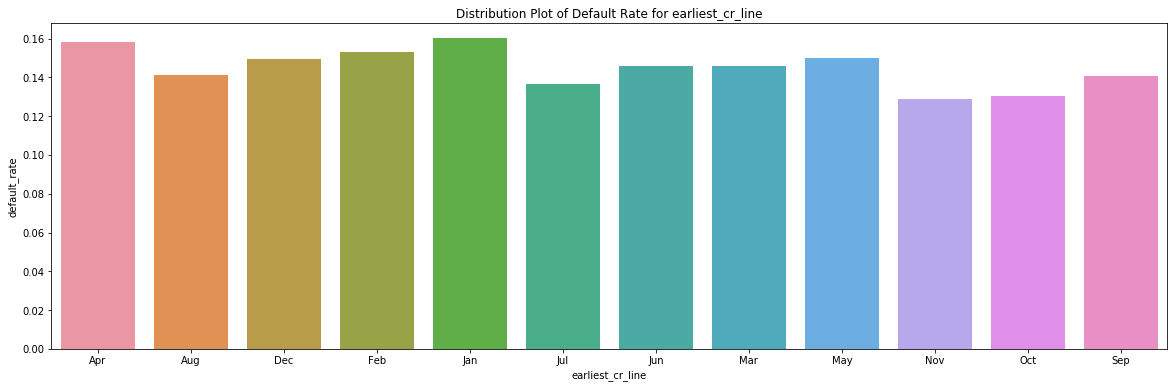

In [170]:
df_not_default['earliest_cr_line'] = pd.Series([x.split('-')[0] for x in np.array(df_not_default['earliest_cr_line'])])
df_default['earliest_cr_line'] = pd.Series([x.split('-')[0] for x in np.array(df_default['earliest_cr_line'])])

earliest_cr_line_analysis = pd.DataFrame(df_not_default.groupby('earliest_cr_line')['earliest_cr_line'].count())
earliest_cr_line_analysis['Not_Defaulter_Count'] = pd.DataFrame(df_not_default.groupby('earliest_cr_line')['earliest_cr_line'].count())['earliest_cr_line']
earliest_cr_line_analysis.fillna(0, inplace = True)
earliest_cr_line_analysis.drop('earliest_cr_line', axis = 1, inplace = True)
earliest_cr_line_analysis['Defaulter_Count'] = pd.DataFrame(df_default.groupby('earliest_cr_line')['earliest_cr_line'].count())['earliest_cr_line']
earliest_cr_line_analysis.fillna(0, inplace = True)
earliest_cr_line_analysis['default_rate'] = earliest_cr_line_analysis['Defaulter_Count']/(earliest_cr_line_analysis['Not_Defaulter_Count'] + earliest_cr_line_analysis['Defaulter_Count'])
earliest_cr_line_analysis.reset_index(inplace = True)


plt.figure(figsize = (20,6))
sns.barplot(x = 'earliest_cr_line', y = 'default_rate', data = earliest_cr_line_analysis)
plt.title('Distribution Plot of Default Rate for earliest_cr_line')

plt.show()

# It can be concluded that for earliest_cr_line = 'Janurary', there are higher chances of the borrower to be a DEFAULTER

# 14. inq_last_6mths 

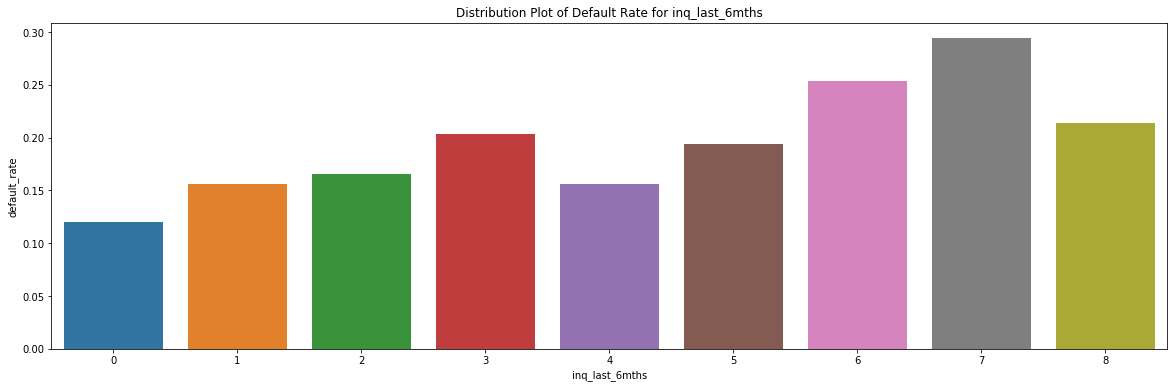

In [171]:
inq_last_6mths_analysis = pd.DataFrame(df_not_default.groupby('inq_last_6mths')['inq_last_6mths'].count())
inq_last_6mths_analysis['Not_Defaulter_Count'] = pd.DataFrame(df_not_default.groupby('inq_last_6mths')['inq_last_6mths'].count())['inq_last_6mths']
inq_last_6mths_analysis.fillna(0, inplace = True)
inq_last_6mths_analysis.drop('inq_last_6mths', axis = 1, inplace = True)
inq_last_6mths_analysis['Defaulter_Count'] = pd.DataFrame(df_default.groupby('inq_last_6mths')['inq_last_6mths'].count())['inq_last_6mths']
inq_last_6mths_analysis.fillna(0, inplace = True)
inq_last_6mths_analysis['default_rate'] = inq_last_6mths_analysis['Defaulter_Count']/(inq_last_6mths_analysis['Not_Defaulter_Count'] + inq_last_6mths_analysis['Defaulter_Count'])
inq_last_6mths_analysis.reset_index(inplace = True)


plt.figure(figsize = (20,6))
sns.barplot(x = 'inq_last_6mths', y = 'default_rate', data = inq_last_6mths_analysis)
plt.title('Distribution Plot of Default Rate for inq_last_6mths')

plt.show()

# It can be concluded that for inq_last_6mths = 7, there are higher chances of the borrower to be a DEFAULTER

# 15. pub_rec

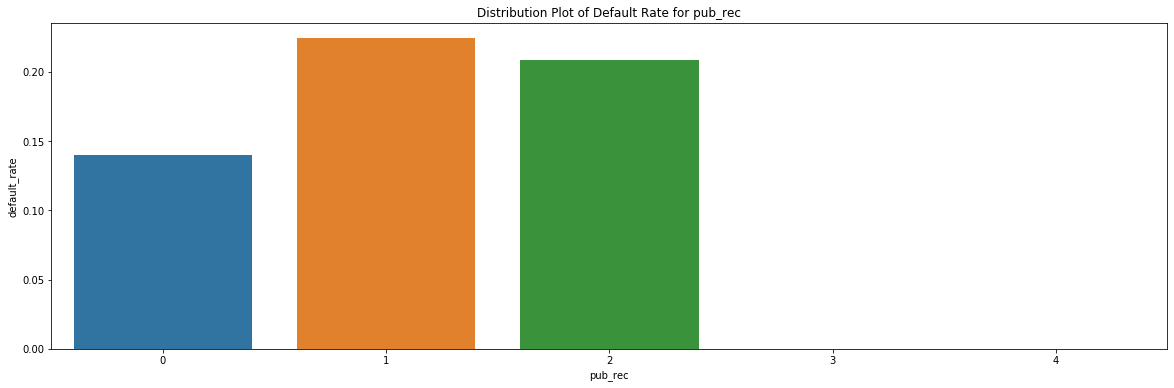

In [172]:
pub_rec_analysis = pd.DataFrame(df_not_default.groupby('pub_rec')['pub_rec'].count())
pub_rec_analysis['Not_Defaulter_Count'] = pd.DataFrame(df_not_default.groupby('pub_rec')['pub_rec'].count())['pub_rec']
pub_rec_analysis.fillna(0, inplace = True)
pub_rec_analysis.drop('pub_rec', axis = 1, inplace = True)
pub_rec_analysis['Defaulter_Count'] = pd.DataFrame(df_default.groupby('pub_rec')['pub_rec'].count())['pub_rec']
pub_rec_analysis.fillna(0, inplace = True)
pub_rec_analysis['default_rate'] = pub_rec_analysis['Defaulter_Count']/(pub_rec_analysis['Not_Defaulter_Count'] + pub_rec_analysis['Defaulter_Count'])
pub_rec_analysis.reset_index(inplace = True)


plt.figure(figsize = (20,6))
sns.barplot(x = 'pub_rec', y = 'default_rate', data = pub_rec_analysis)
plt.title('Distribution Plot of Default Rate for pub_rec')

plt.show()

# It can be concluded that for pub_rec = 1, there are higher chances of the borrower to be a DEFAULTER

# 16. last_pymnt_d

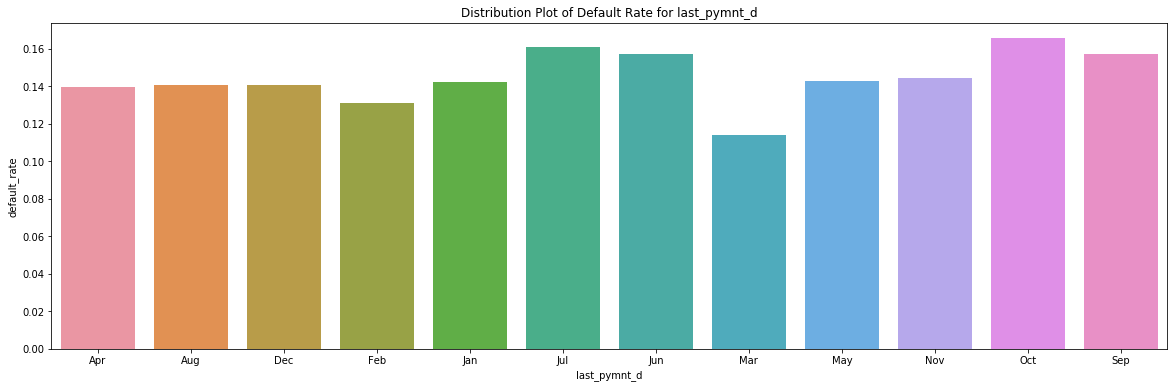

In [173]:
df_not_default['last_pymnt_d'] = pd.Series([x.split('-')[0] for x in np.array(df_not_default['last_pymnt_d'])])
df_default['last_pymnt_d'] = pd.Series([x.split('-')[0] for x in np.array(df_default['last_pymnt_d'])])

last_pymnt_d_analysis = pd.DataFrame(df_not_default.groupby('last_pymnt_d')['last_pymnt_d'].count())
last_pymnt_d_analysis['Not_Defaulter_Count'] = pd.DataFrame(df_not_default.groupby('last_pymnt_d')['last_pymnt_d'].count())['last_pymnt_d']
last_pymnt_d_analysis.fillna(0, inplace = True)
last_pymnt_d_analysis.drop('last_pymnt_d', axis = 1, inplace = True)
last_pymnt_d_analysis['Defaulter_Count'] = pd.DataFrame(df_default.groupby('last_pymnt_d')['last_pymnt_d'].count())['last_pymnt_d']
last_pymnt_d_analysis.fillna(0, inplace = True)
last_pymnt_d_analysis['default_rate'] = last_pymnt_d_analysis['Defaulter_Count']/(last_pymnt_d_analysis['Not_Defaulter_Count'] + last_pymnt_d_analysis['Defaulter_Count'])
last_pymnt_d_analysis.reset_index(inplace = True)


plt.figure(figsize = (20,6))
sns.barplot(x = 'last_pymnt_d', y = 'default_rate', data = last_pymnt_d_analysis)
plt.title('Distribution Plot of Default Rate for last_pymnt_d')

plt.show()

# It can be concluded that for last_pymnt_d = 'October', there are higher chances of the borrower to be a DEFAULTER

# 18. last_credit_pull_d

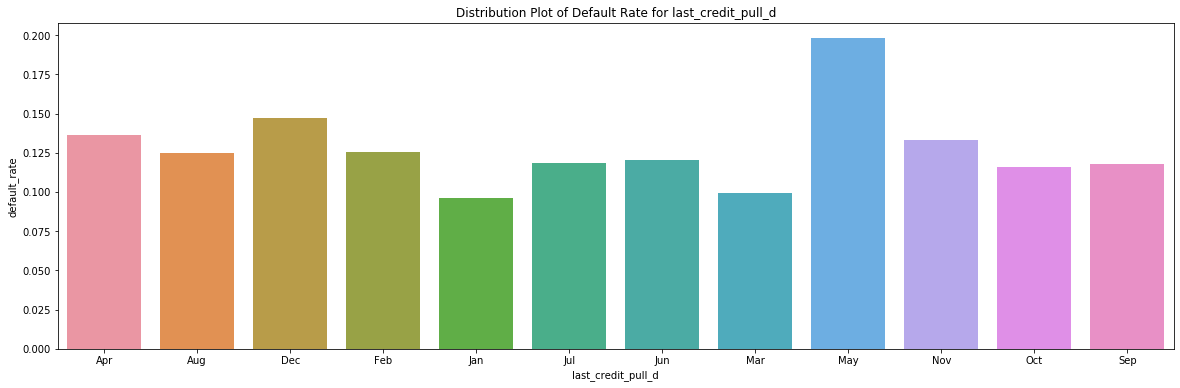

In [174]:
df_not_default['last_credit_pull_d'] = pd.Series([x.split('-')[0] for x in np.array(df_not_default['last_credit_pull_d'])])
df_default['last_credit_pull_d'] = pd.Series([x.split('-')[0] for x in np.array(df_default['last_credit_pull_d'])])

last_credit_pull_d_analysis = pd.DataFrame(df_not_default.groupby('last_credit_pull_d')['last_credit_pull_d'].count())
last_credit_pull_d_analysis['Not_Defaulter_Count'] = pd.DataFrame(df_not_default.groupby('last_credit_pull_d')['last_credit_pull_d'].count())['last_credit_pull_d']
last_credit_pull_d_analysis.fillna(0, inplace = True)
last_credit_pull_d_analysis.drop('last_credit_pull_d', axis = 1, inplace = True)
last_credit_pull_d_analysis['Defaulter_Count'] = pd.DataFrame(df_default.groupby('last_credit_pull_d')['last_credit_pull_d'].count())['last_credit_pull_d']
last_credit_pull_d_analysis.fillna(0, inplace = True)
last_credit_pull_d_analysis['default_rate'] = last_credit_pull_d_analysis['Defaulter_Count']/(last_credit_pull_d_analysis['Not_Defaulter_Count'] + last_credit_pull_d_analysis['Defaulter_Count'])
last_credit_pull_d_analysis.reset_index(inplace = True)


plt.figure(figsize = (20,6))
sns.barplot(x = 'last_credit_pull_d', y = 'default_rate', data = last_credit_pull_d_analysis)
plt.title('Distribution Plot of Default Rate for last_credit_pull_d')

plt.show()

# It can be concluded that for last_credit_pull_d = 'May', there are higher chances of the borrower to be a DEFAULTER

# 19. pub_rec_bankruptcies

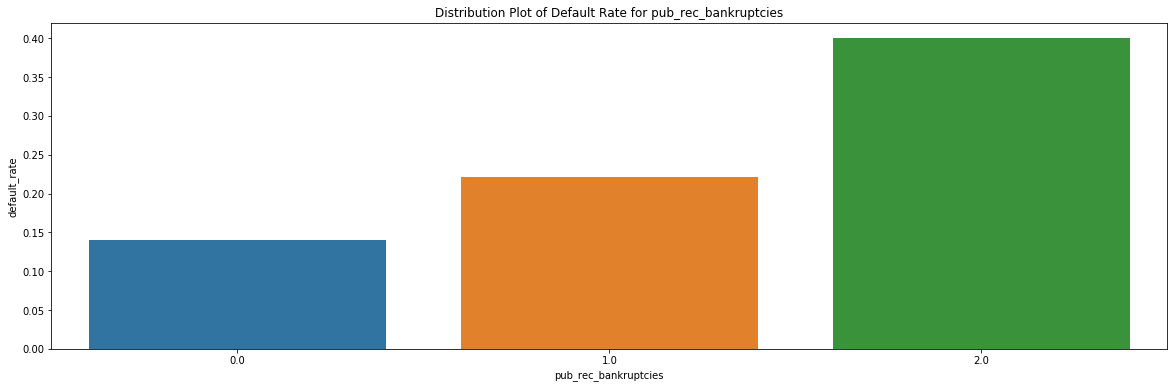

In [175]:
pub_rec_bankruptcies_analysis = pd.DataFrame(df_not_default.groupby('pub_rec_bankruptcies')['pub_rec_bankruptcies'].count())
pub_rec_bankruptcies_analysis['Not_Defaulter_Count'] = pd.DataFrame(df_not_default.groupby('pub_rec_bankruptcies')['pub_rec_bankruptcies'].count())['pub_rec_bankruptcies']
pub_rec_bankruptcies_analysis.fillna(0, inplace = True)
pub_rec_bankruptcies_analysis.drop('pub_rec_bankruptcies', axis = 1, inplace = True)
pub_rec_bankruptcies_analysis['Defaulter_Count'] = pd.DataFrame(df_default.groupby('pub_rec_bankruptcies')['pub_rec_bankruptcies'].count())['pub_rec_bankruptcies']
pub_rec_bankruptcies_analysis.fillna(0, inplace = True)
pub_rec_bankruptcies_analysis['default_rate'] = pub_rec_bankruptcies_analysis['Defaulter_Count']/(pub_rec_bankruptcies_analysis['Not_Defaulter_Count'] + pub_rec_bankruptcies_analysis['Defaulter_Count'])
pub_rec_bankruptcies_analysis.reset_index(inplace = True)


plt.figure(figsize = (20,6))
sns.barplot(x = 'pub_rec_bankruptcies', y = 'default_rate', data = pub_rec_bankruptcies_analysis)
plt.title('Distribution Plot of Default Rate for pub_rec_bankruptcies')

plt.show()

# It can be concluded that for pub_rec_bankruptcies = 2.0, there are higher chances of the borrower to be a DEFAULTER